In [2]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import json
from matplotlib.colors import LinearSegmentedColormap



import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import LineString

# CMU Colors

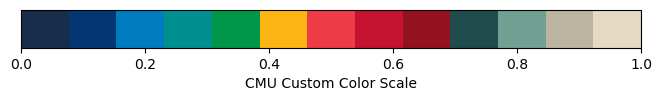

In [3]:
# CMU color scale in HEX
cmu_gradient_colors = [
    "#182C4B",  # Deep Blue (Weaver Blue)
    "#043673",  # Dark Blue (CMU Blue)
    "#007BC0",  # Sky Blue (Highlands Sky)
    "#008F91",  # Teal
    "#009647",  # Green Thread
    "#FDB515",  # Gold Thread
    "#EF3A47",  # Scots Rose (Bright Red)
    "#C41230",  # CMU Red
    "#941120",  # Dark Red (Skibo Red)
    "#1F4C4C",  # Deep Green (Hornbostel Teal)
    "#719F94",  # Palladian Green
    "#BCB49E",  # Soft Tan
    "#E4DAC4"   # Light Beige
]

# ListedColormap
cmu_cmap = mcolors.ListedColormap(cmu_gradient_colors, name="cmu_scale")

# Display color scale
fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

# Create color bar
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmu_cmap, norm=plt.Normalize(vmin=0, vmax=1)),
    cax=ax,
    orientation="horizontal"
)
cbar.set_label("CMU Custom Color Scale")

plt.show()

# Loading Files 

In [4]:
# Points and boundaries
geo_points_df = gpd.read_file('../data/facilities_points_rw.geojson')
dist_gdf = gpd.read_file('../data\District_Boundaries.geojson') # # https://rwanda.africageoportal.com/datasets/be7b39ac16094f1fba36f62c55b47986_0/explore
pop_df = pd.read_csv('../data/rw_population.csv')

# Areas, centroids, and boundaries
dist_gdf["area"] = dist_gdf.area
dist_gdf["Centroid"] = dist_gdf.centroid
dist_gdf["boundary"] = dist_gdf.boundary
gdf = dist_gdf.copy()

#Facilities
geo_points_df['amenity'] = geo_points_df['amenity'].fillna(geo_points_df['healthcare'])
all_facilities = geo_points_df['amenity'].unique()

# Main facilities
main_facility = ['clinic', 'pharmacy', 'hospital', 'centre', 'health_post', 'yes', 'doctors', 'laboratory', 'alternative']
num_facilities = len(main_facility)
main_facility_df = geo_points_df[geo_points_df['amenity'].isin(main_facility)]

# Color pallets 
colors = [
    "#FDB515",  # Gold Thread
    "#EF3A47",  # Scots Rose (Bright Red)
    "#C41230",  # CMU Red
    "#007BC0",  # Sky Blue (Highlands Sky)
    "#008F91",  # Teal
    "#009647",  # Green Thread
    "#043673",  # Dark Blue (CMU Blue)
    "#182C4B",  # Deep Blue (Weaver Blue)
    "#1F4C4C"   # Deep Green (Hornbostel Teal)
]

# Print json of ditsricts and their surface areas
districts_areas = gdf[['district', 'area']]
json_districts_areas = districts_areas.to_json(orient='records')
print(json_districts_areas)
#geo_points_df.head()

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26180\2211758234.py:3: SyntaxWarning: invalid escape sequence '\D'
  dist_gdf = gpd.read_file('../data\District_Boundaries.geojson') # # https://rwanda.africageoportal.com/datasets/be7b39ac16094f1fba36f62c55b47986_0/explore


[{"district":"Nyarugenge","area":0.0107676087},{"district":"Gasabo","area":0.0348919994},{"district":"Kicukiro","area":0.0135770024},{"district":"Nyanza","area":0.0545895127},{"district":"Gisagara","area":0.0548408582},{"district":"Nyaruguru","area":0.0819123502},{"district":"Huye","area":0.0472511732},{"district":"Nyamagabe","area":0.0887126848},{"district":"Ruhango","area":0.0508872032},{"district":"Muhanga","area":0.0525611676},{"district":"Kamonyi","area":0.0536371008},{"district":"Karongi","area":0.0641216855},{"district":"Rutsiro","area":0.0537961889},{"district":"Rubavu","area":0.0274031576},{"district":"Nyabihu","area":0.0437082705},{"district":"Ngororero","area":0.0549868758},{"district":"Rusizi","area":0.0745606117},{"district":"Nyamasheke","area":0.0771476697},{"district":"Rulindo","area":0.0461100076},{"district":"Gakenke","area":0.0572127825},{"district":"Musanze","area":0.0428862056},{"district":"Burera","area":0.0524479662},{"district":"Gicumbi","area":0.0673215996},{"di

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26180\2211758234.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_gdf["area"] = dist_gdf.area
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26180\2211758234.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_gdf["Centroid"] = dist_gdf.centroid


In [5]:
# Print all facilities
print(main_facility)

['clinic', 'pharmacy', 'hospital', 'centre', 'health_post', 'yes', 'doctors', 'laboratory', 'alternative']


# Faciility Distribution Maps 

['clinic' 'pharmacy' 'hospital' 'dentist' 'centre' 'health_post' 'yes'
 'doctors' 'laboratory' 'alternative']


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26180\2793421074.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid


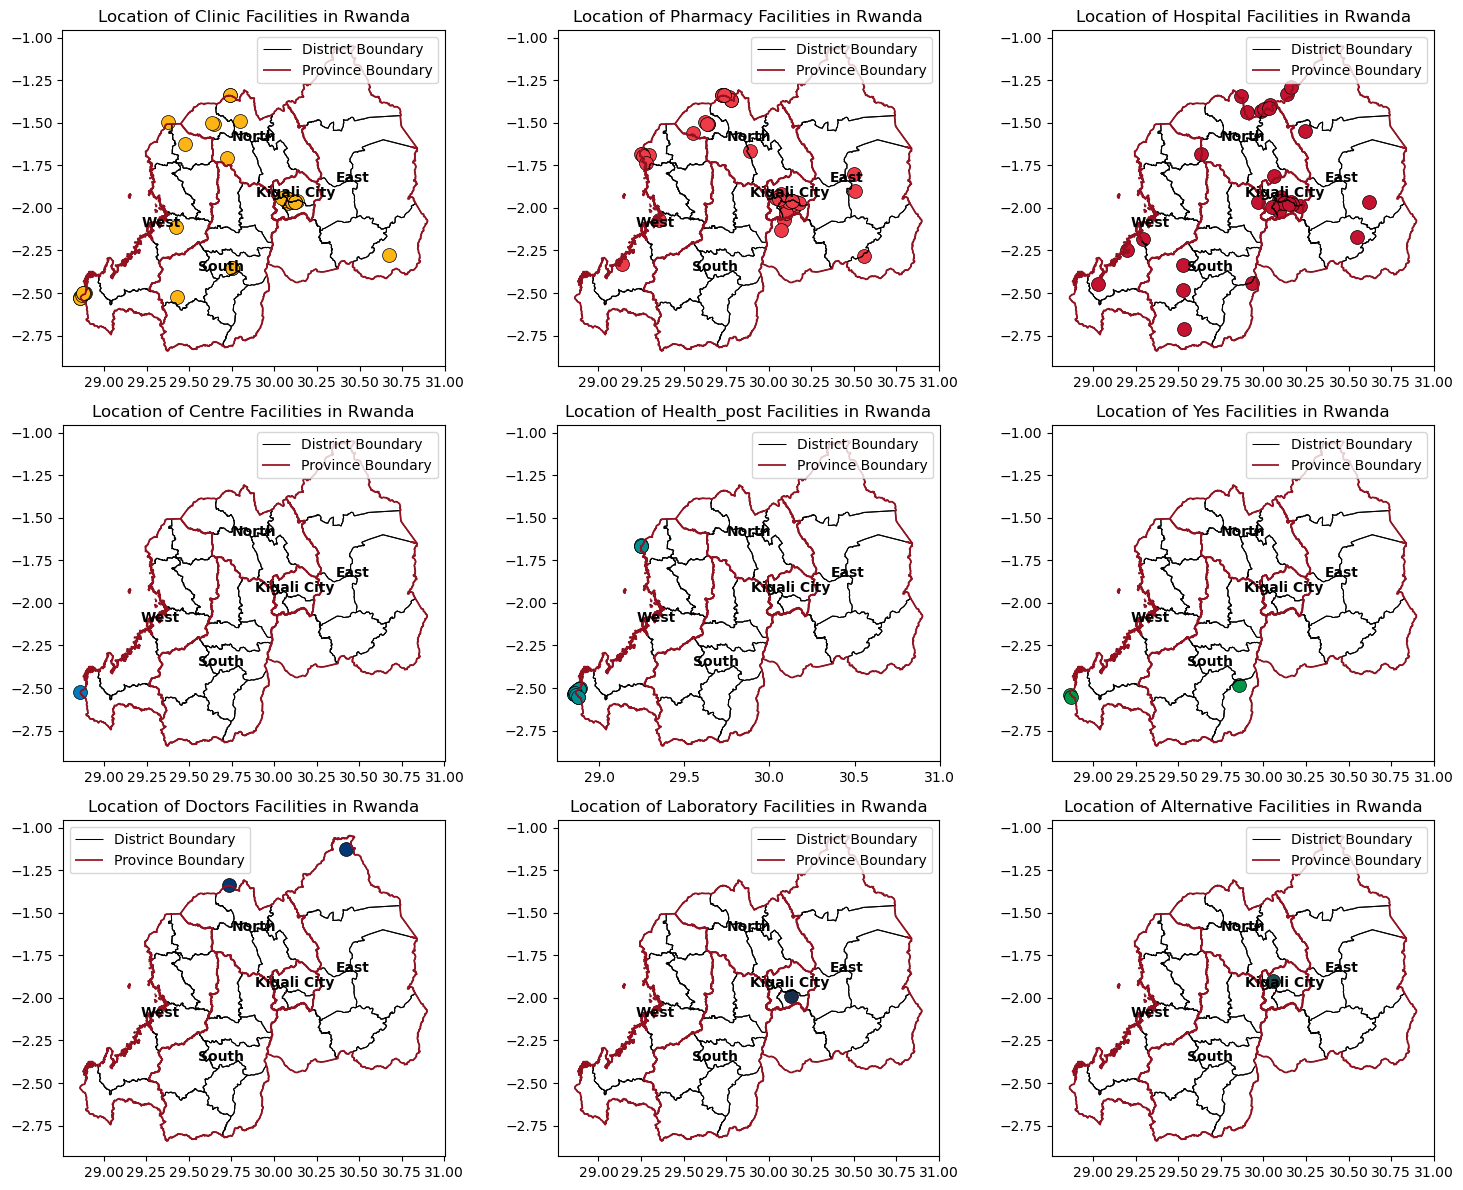

In [6]:
# Print all facilities 
print(all_facilities)


# Grid of subplots 
rows = 3 
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()

# Dissolved districts to get province boundaries and compute province centroids
province_gdf = gdf.dissolve(by='prov_code', as_index=False)
province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid

# Loop through each facility type and create a plot in the corresponding subplot
for i, facility in enumerate(main_facility):
    ax = axes[i]

    # Plot district and province boundaries
    gdf.boundary.plot(ax=ax, color='black', linewidth=0.75, label='District Boundary')
    province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.25, label='Province Boundary')
    
    ax.legend()

    # Title for each plot
    ax.set_title(f"Location of {facility.capitalize()} Facilities in Rwanda", fontsize=12)

    # Annotate each province **only once** at its centroid
    for idx, row in province_gdf.iterrows():
        ax.annotate(text=row["province_eng"], 
                    xy=[row["Centroid"].x, row["Centroid"].y], 
                    ha='center', fontsize=10, fontweight='bold', color='black')

    # Filtered health facility
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]

    # Plot the selected health facility type with a unique color
    facility_gdf.plot(ax=ax, color=colors[i], markersize=100, label=facility, legend=True, edgecolor='black', linewidth=0.5)

for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26180\3754129594.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid


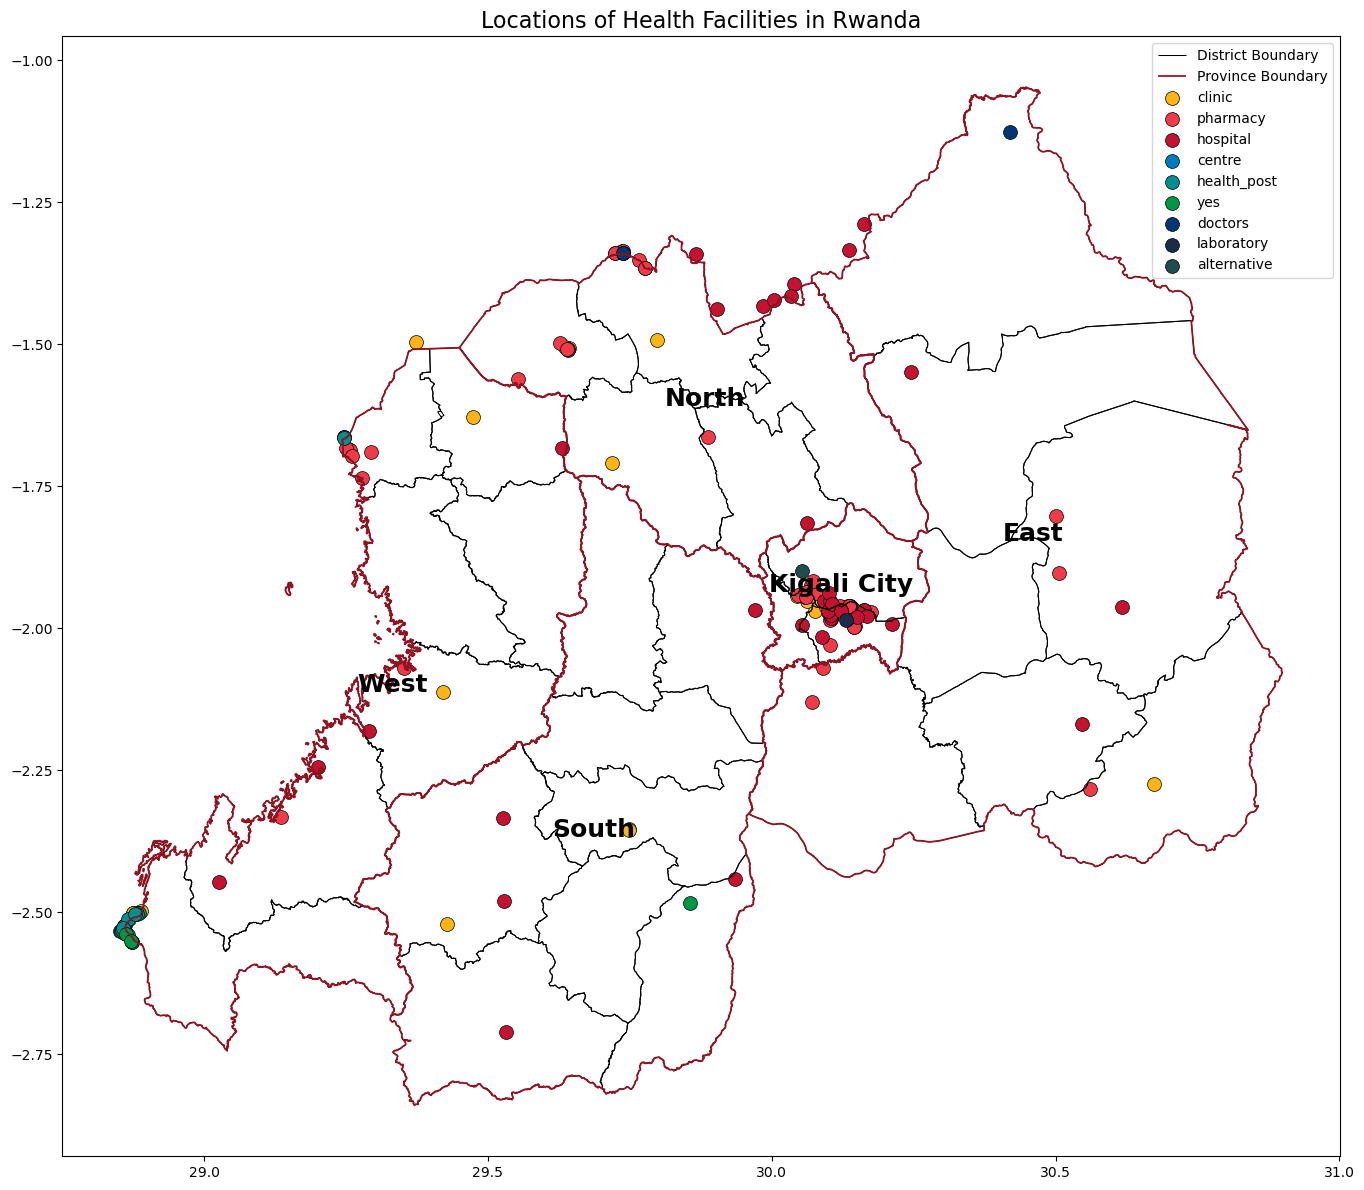

In [7]:
# Create a single plot
fig, ax = plt.subplots(figsize=(15, 12))

# Dissolved districts to get province boundaries and compute province centroids
province_gdf = gdf.dissolve(by='prov_code', as_index=False)
province_gdf["Centroid"] = province_gdf.geometry.centroid  # Compute province centroid

# Plot district and province boundaries
gdf.boundary.plot(ax=ax, color='black', linewidth=0.75, label='District Boundary')
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.25, label='Province Boundary')

# Annotate each province at its centroid
for idx, row in province_gdf.iterrows():
    ax.annotate(text=row["province_eng"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=18, fontweight='bold', color='black', alpha=1)

# Plot each health facility type with a unique color
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add legend and title
ax.legend()
ax.set_title("Locations of Health Facilities in Rwanda", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Map with all facilities.

<Axes: >

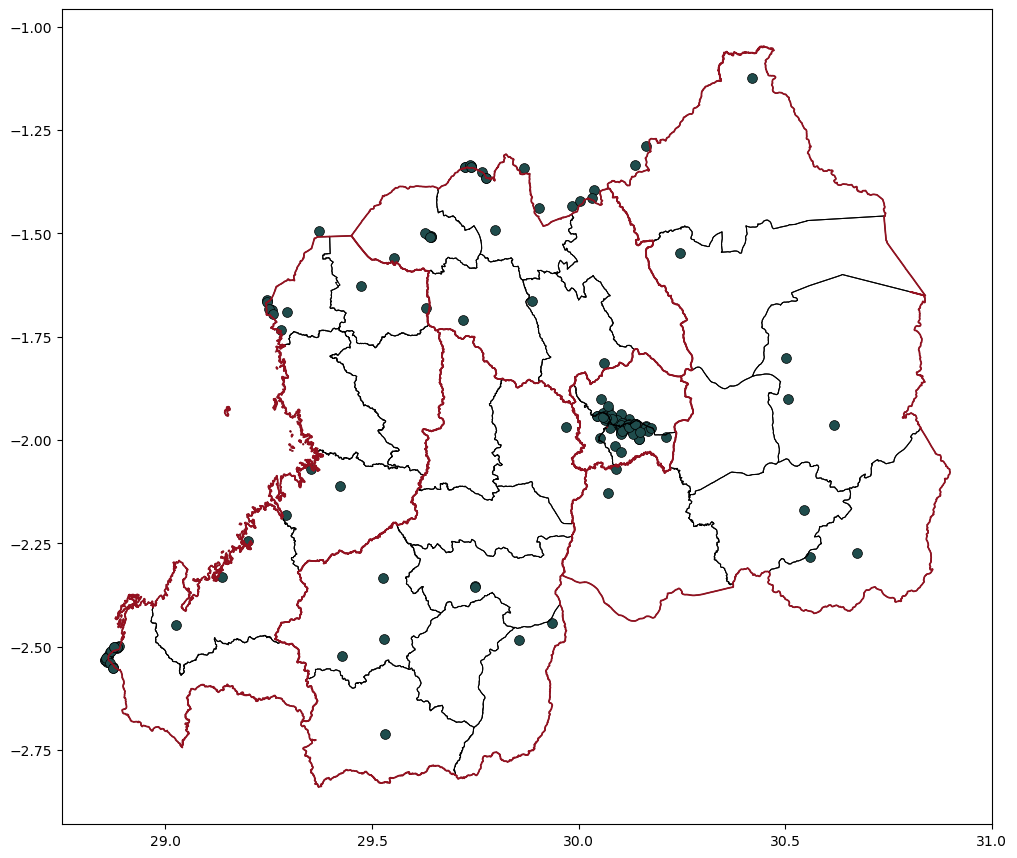

In [8]:
# Map of Rwanda with all health facilities
fig, ax = plt.subplots(figsize=(12, 12))
gdf.boundary.plot(ax=ax, color='black', linewidth=0.75, label='District Boundary')
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.25, label='Province Boundary')
geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)
#facility_gdf.plot(ax=ax, color="red", markersize=100, label=facility, legend=True, edgecolor='black', linewidth=0.5)



# Population Density 


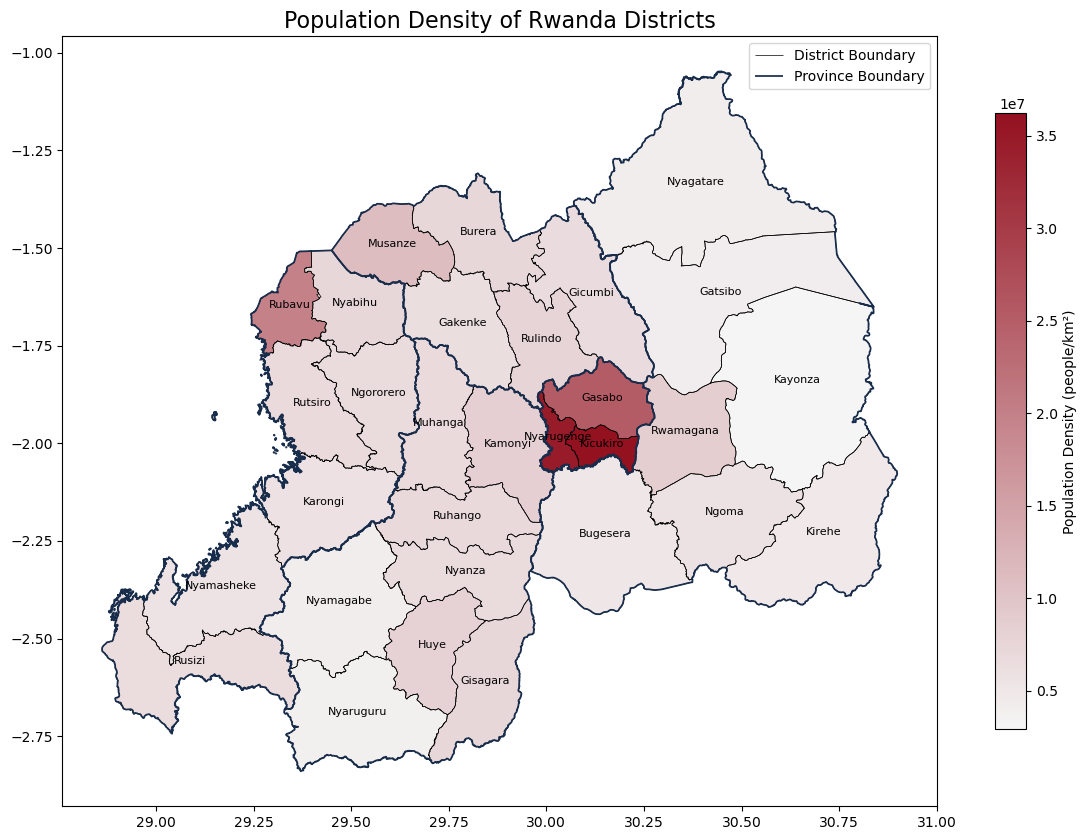

In [9]:
gdf['population'] = gdf['district'].map(pop_df.set_index('District')['Population'])
gdf['pop_density'] = gdf['population'] / gdf['area']
pop_dist_gdf = gdf.copy()

# Ensure the 'pop_density' column is numeric
gdf["pop_density"] = pd.to_numeric(gdf["pop_density"])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the population density heatmap
gdf.plot(column="pop_density", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "Population Density (people/km²)", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

#geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Population Density of Rwanda Districts", fontsize=16)
plt.legend()
# Show plot
plt.show()

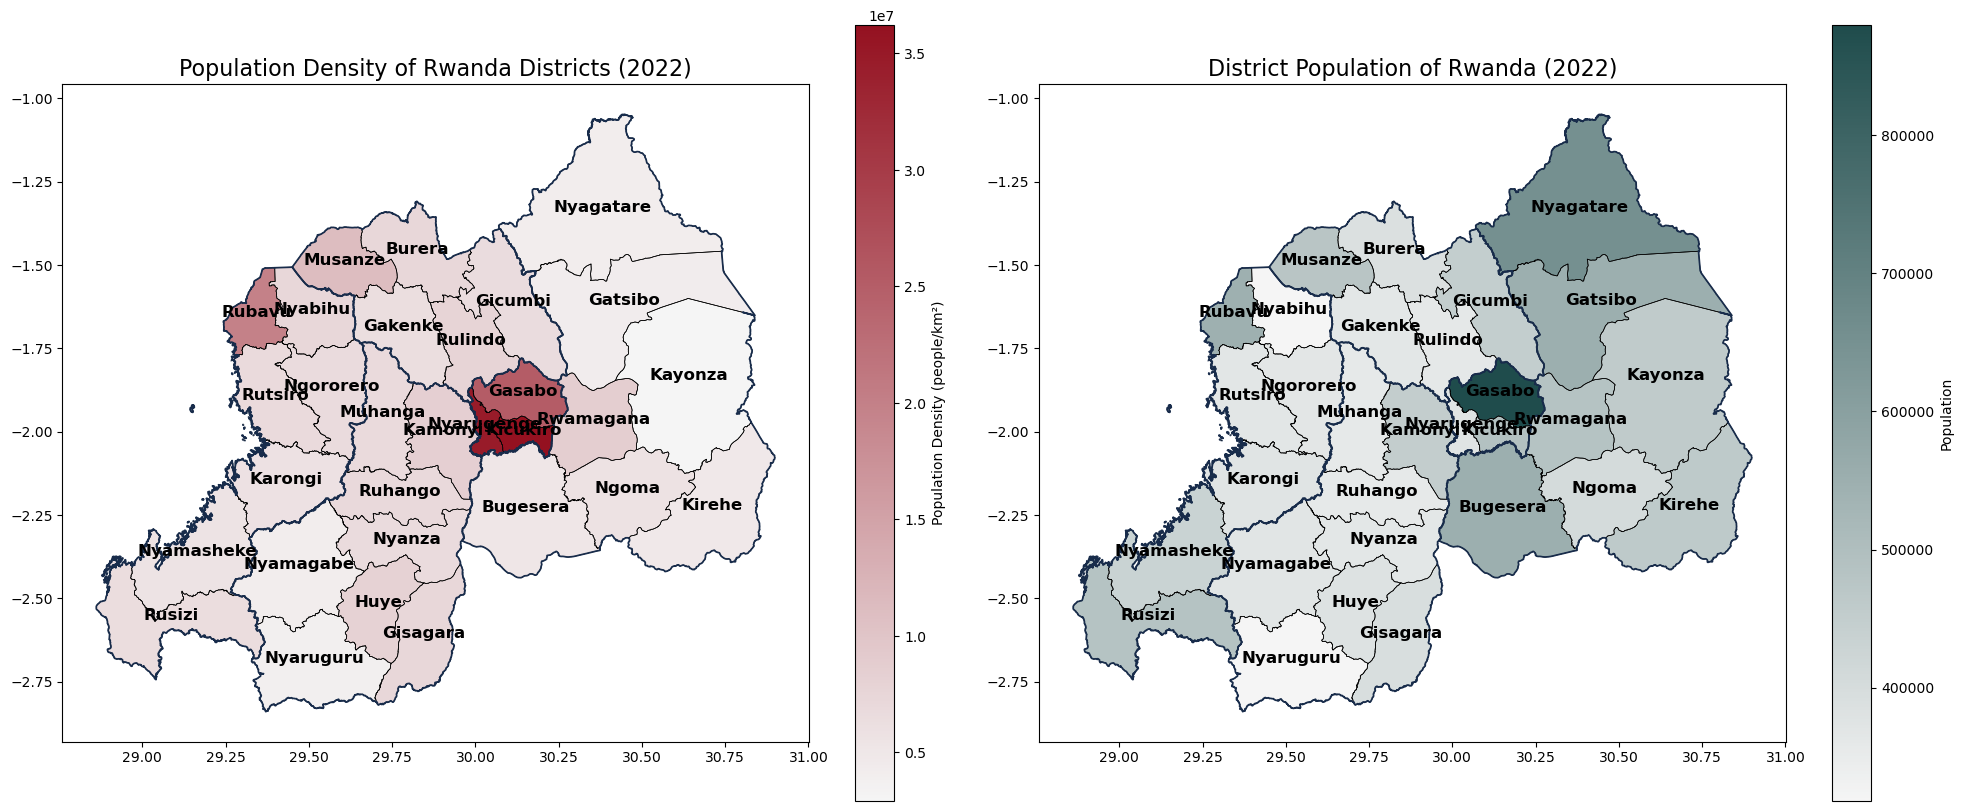

In [10]:
if 'population' not in gdf.columns:
    gdf['population'] = gdf['district'].map(pop_df.set_index('District')['Population'])

# Ensure the 'pop_density' column is calculated
if 'pop_density' not in gdf.columns:
    gdf['pop_density'] = gdf['population'] / gdf['area']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient_density = ["#F5F5F5", "#941120"]
gradient_population = ["#F5F5F5", "#1F4C4C"]
cmap_density = LinearSegmentedColormap.from_list("custom_gradient_density", gradient_density)
cmap_population = LinearSegmentedColormap.from_list("custom_gradient_population", gradient_population)

# --- First Plot: Population Density ---
# Plot the base map (district boundaries)
gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the population density heatmap
gdf.plot(column="pop_density", ax=axes[0], cmap=cmap_density, legend=True, 
         legend_kwds={"label": "Population Density (people/km²)", "shrink": 0.8})
province_gdf.boundary.plot(ax=axes[0], color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations
for idx, row in gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, fontweight='bold', color='black')

# Add title for the first plot
axes[0].set_title("Population Density of Rwanda Districts (2022)", fontsize=16)

# --- Second Plot: Actual Population ---
# Plot the base map (district boundaries)
gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Plot the actual population heatmap
gdf.plot(column="population", ax=axes[1], cmap=cmap_population, legend=True, 
         legend_kwds={"label": "Population", "shrink": 0.8})
province_gdf.boundary.plot(ax=axes[1], color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations
for idx, row in gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, fontweight='bold', color='black')

# Add title for the second plot
axes[1].set_title("District Population of Rwanda (2022)", fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

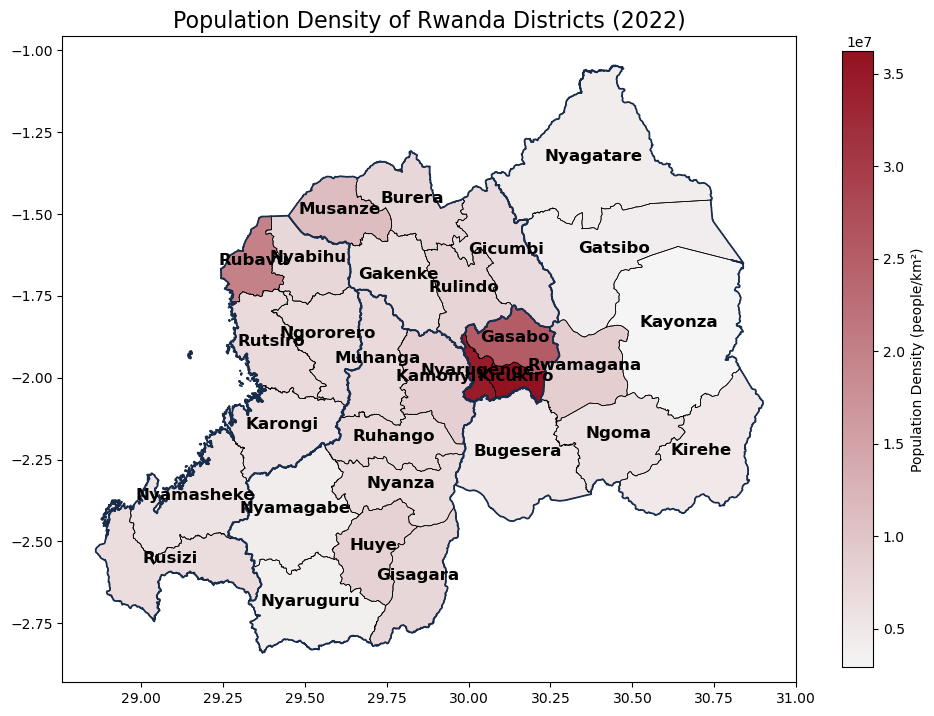

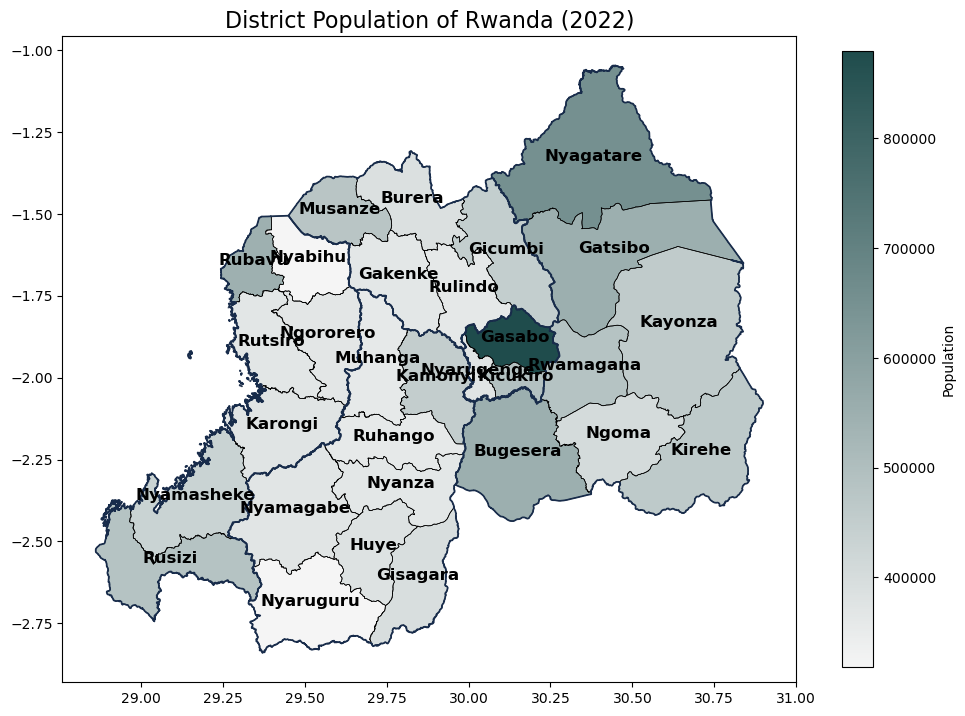

In [24]:
if 'population' not in gdf.columns:
    gdf['population'] = gdf['district'].map(pop_df.set_index('District')['Population'])

# Ensure the 'pop_density' column is calculated
if 'pop_density' not in gdf.columns:
    gdf['pop_density'] = gdf['population'] / gdf['area']

# Define the gradient for the colormap
gradient_density = ["#F5F5F5", "#941120"]
gradient_population = ["#F5F5F5", "#1F4C4C"]
cmap_density = LinearSegmentedColormap.from_list("custom_gradient_density", gradient_density)
cmap_population = LinearSegmentedColormap.from_list("custom_gradient_population", gradient_population)

# --- First Plot: Population Density ---
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map (district boundaries)
gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the population density heatmap
gdf.plot(column="pop_density", ax=ax, cmap=cmap_density, legend=True, 
         legend_kwds={"label": "Population Density (people/km²)", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations
for idx, row in gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, fontweight='bold', color='black')

# Add title for the first plot
ax.set_title("Population Density of Rwanda Districts (2022)", fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# --- Second Plot: Actual Population ---
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map (district boundaries)
gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the actual population heatmap
gdf.plot(column="population", ax=ax, cmap=cmap_population, legend=True, 
         legend_kwds={"label": "Population", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations
for idx, row in gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, fontweight='bold', color='black')

# Add title for the second plot
ax.set_title("District Population of Rwanda (2022)", fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Is there a correlation with the disease desity and facility distribution density??????????

# Disease Prevelence Annalysis 

In [11]:
# Total population for each province
province_population = gdf.groupby('province')['population'].sum().reset_index()
province_population.columns = ['province', 'total_population']

# Merge total population back into the original GeoDataFrame
gdf = gdf.merge(province_population, on='province', suffixes=('', '_total'))

# Population ratio
gdf['dist_pop_ratio'] = gdf['population'] / gdf['total_population']

# gdf.head(5)
disease_gdf = gdf.copy()
disease_gdf.head(5)

objectid code_dist prov_code          province province_eng dist_code  \
0         1        11         1  Umujyi wa Kigali  Kigali City        11   
1         2        12         1  Umujyi wa Kigali  Kigali City        12   
2         3        13         1  Umujyi wa Kigali  Kigali City        13   
3         4        21         2         Amajyepfo        South        21   
4         5        22         2         Amajyepfo        South        22   

     district        source capture                                globalid  \
0  Nyarugenge          DLUP    2012  {79DEA8B0-F1F5-4BDB-ABFD-BBA8B9E75ED6}   
1      Gasabo          DLUP    2012  {5A2A6334-F94F-4191-9BC7-1077A5061D38}   
2    Kicukiro          DLUP    2012  {2F253D10-9ADC-4318-9CA0-0DF3A7D50164}   
3      Nyanza  Single layer    2012  {4B50C062-7024-45FB-82D6-0513EF527A49}   
4    Gisagara          DLUP    2012  {15D1D4DC-D845-480A-9F21-098F04AC8280}   

   ... shape_Length shape_Area  \
0  ...     0.924370   0.010768   
1  ...     1.010862   0.034892   
2  ...     0.767627   0.013577   
3  ...     1.604870   0.054590   
4  ...     1.381505   0.054841   

                                            geometry      area  \
0  MULTIPOLYGON Z (((29.98964 -1.86756 0, 29.9895...  0.010768   
1  MULTIPOLYGON Z (((30.14786 -1.79269 0, 30.1480...  0.034892   
2  MULTIPOLYGON Z (((30.14789 -1.95542 0, 30.1481...  0.013577   
3  MULTIPOLYGON Z (((29.95084 -2.23321 0, 29.9514...  0.054590   
4  MULTIPOLYGON Z (((29.96337 -2.43834 0, 29.9636...  0.054841   

                    Centroid  \
0    POINT (30.02887 -1.992)   
1  POINT (30.14221 -1.89145)   
2  POINT (30.14373 -2.00886)   
3  POINT (29.79335 -2.33584)   
4  POINT (29.84351 -2.61752)   

                                            boundary  population  \
0  MULTILINESTRING Z ((29.98964 -1.86756 0, 29.98...      374319   
1  MULTILINESTRING Z ((30.14786 -1.79269 0, 30.14...      879505   
2  MULTILINESTRING Z ((30.14789 -1.95542 0, 30.14...      491731   
3  MULTILINESTRING Z ((29.95084 -2.23321 0, 29.95...      365718   
4  MULTILINESTRING Z ((29.96337 -2.43834 0, 29.96...      397051   

    pop_density  total_population dist_pop_ratio  
0  3.476343e+07           1745555       0.214441  
1  2.520649e+07           1745555       0.503854  
2  3.621794e+07           1745555       0.281705  
3  6.699419e+06           3002699       0.121796  
4  7.240058e+06           3002699       0.132231  

[5 rows x 25 columns]

### Tubaculosis 

In [12]:
with open("tuberculosis_data.json", "r") as file:
    tb_data = json.load(file) 

# Convert the JSON data to a DataFrame
tb_df = pd.DataFrame(tb_data)
tb_df = tb_df.T

tb_df['total_tb_cases'] = tb_df['women_number_with_symptom'] + tb_df['men_number_with_symptom']
tb_df['case_ratio_dist'] = tb_df['total_tb_cases'] / (tb_df['women_number']+ tb_df['men_number'])
tb_df.head(5)

# reset index and rename column to province
tb_df.reset_index(inplace=True)
tb_df.rename(columns={'index': 'category'}, inplace=True)

# disease_gdf['tb_cases'] = total_tb_cases*dist_pop_ratio where province_eng == index of tb_df
disease_gdf['tb_dist_ratio'] = disease_gdf['province_eng'].map(tb_df.set_index('category')['case_ratio_dist']) * disease_gdf['dist_pop_ratio']
disease_gdf['tb_dist_cases'] = disease_gdf['tb_dist_ratio'] * disease_gdf['population']
disease_gdf['tb_density'] = disease_gdf['tb_dist_cases'] / disease_gdf['area']

#disease_gdf.head(5)

tb_df.head(5)
disease_gdf.head(5)


objectid code_dist prov_code          province province_eng dist_code  \
0         1        11         1  Umujyi wa Kigali  Kigali City        11   
1         2        12         1  Umujyi wa Kigali  Kigali City        12   
2         3        13         1  Umujyi wa Kigali  Kigali City        13   
3         4        21         2         Amajyepfo        South        21   
4         5        22         2         Amajyepfo        South        22   

     district        source capture                                globalid  \
0  Nyarugenge          DLUP    2012  {79DEA8B0-F1F5-4BDB-ABFD-BBA8B9E75ED6}   
1      Gasabo          DLUP    2012  {5A2A6334-F94F-4191-9BC7-1077A5061D38}   
2    Kicukiro          DLUP    2012  {2F253D10-9ADC-4318-9CA0-0DF3A7D50164}   
3      Nyanza  Single layer    2012  {4B50C062-7024-45FB-82D6-0513EF527A49}   
4    Gisagara          DLUP    2012  {15D1D4DC-D845-480A-9F21-098F04AC8280}   

   ...      area                   Centroid  \
0  ...  0.010768    POINT (30.02887 -1.992)   
1  ...  0.034892  POINT (30.14221 -1.89145)   
2  ...  0.013577  POINT (30.14373 -2.00886)   
3  ...  0.054590  POINT (29.79335 -2.33584)   
4  ...  0.054841  POINT (29.84351 -2.61752)   

                                            boundary population   pop_density  \
0  MULTILINESTRING Z ((29.98964 -1.86756 0, 29.98...     374319  3.476343e+07   
1  MULTILINESTRING Z ((30.14786 -1.79269 0, 30.14...     879505  2.520649e+07   
2  MULTILINESTRING Z ((30.14789 -1.95542 0, 30.14...     491731  3.621794e+07   
3  MULTILINESTRING Z ((29.95084 -2.23321 0, 29.95...     365718  6.699419e+06   
4  MULTILINESTRING Z ((29.96337 -2.43834 0, 29.96...     397051  7.240058e+06   

   total_population  dist_pop_ratio tb_dist_ratio  tb_dist_cases  \
0           1745555        0.214441      0.011761    4402.297425   
1           1745555        0.503854      0.027633   24303.692537   
2           1745555        0.281705      0.015450    7597.151958   
3           3002699        0.121796      0.012649    4626.111897   
4           3002699        0.132231      0.013733    5452.755814   

      tb_density  
0  408846.340375  
1  696540.551887  
2  559560.332504  
3   84743.601252  
4   99428.710514  

[5 rows x 28 columns]

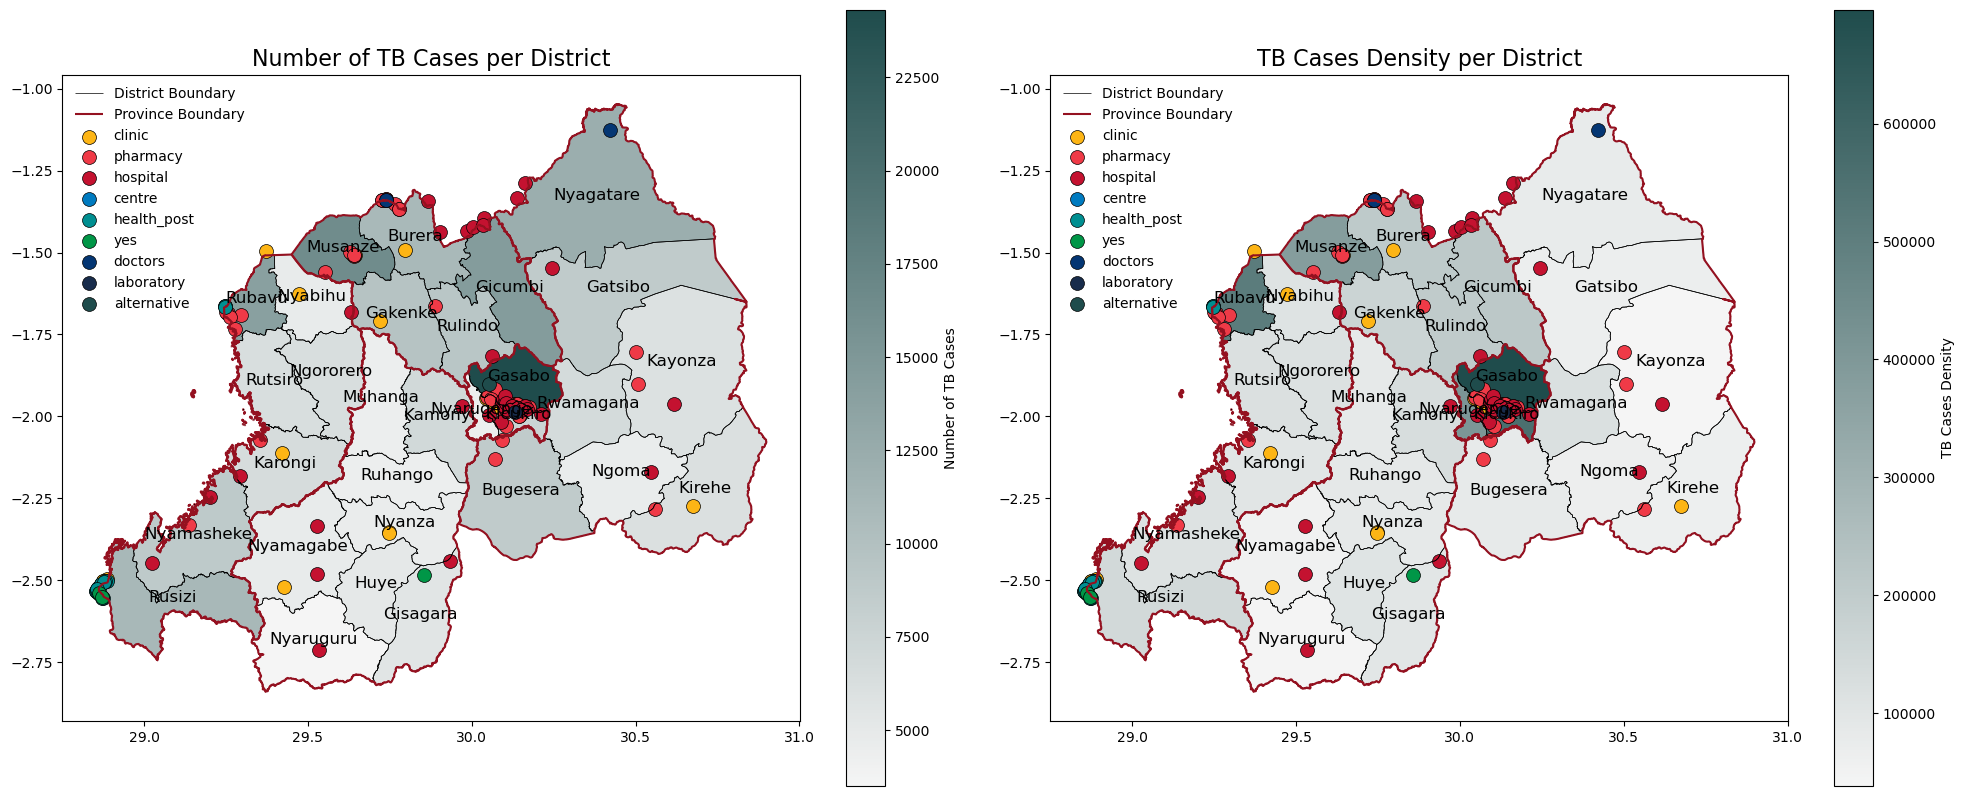

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#1F4C4C"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the TB cases heatmap
disease_gdf.plot(column="tb_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of TB Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=axes[0], color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of TB Cases per District", fontsize=16)
axes[0].legend(loc='upper left', frameon=False)

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="tb_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "TB Cases Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=axes[1], color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

axes[1].set_title("TB Cases Density per District", fontsize=16)
axes[1].legend(loc='upper left', frameon=False)

# Adjusting plot layout
plt.tight_layout()
plt.show()

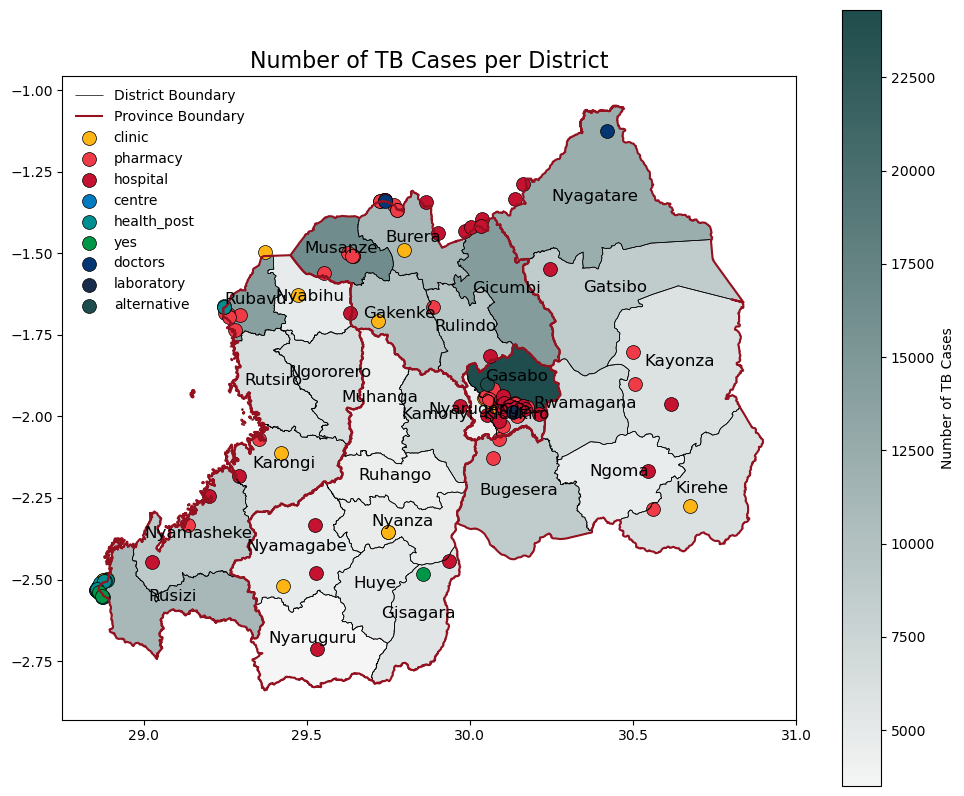

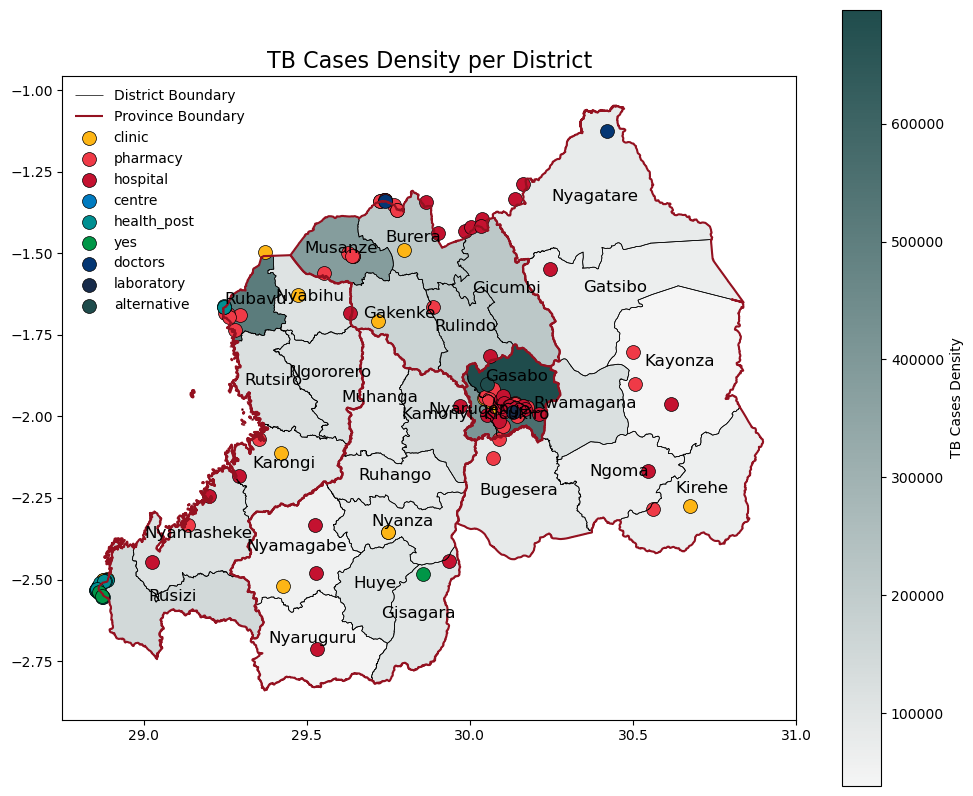

In [23]:
# --- First Plot: TB Cases per District ---
fig, ax = plt.subplots(figsize=(10, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#1F4C4C"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the TB cases heatmap
disease_gdf.plot(column="tb_dist_cases", ax=ax, cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of TB Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title and legend
ax.set_title("Number of TB Cases per District", fontsize=16)
ax.legend(loc='upper left', frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# --- Second Plot: TB Density per District ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the TB density heatmap
disease_gdf.plot(column="tb_density", ax=ax, cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "TB Cases Density", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title and legend
ax.set_title("TB Cases Density per District", fontsize=16)
ax.legend(loc='upper left', frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### TB density correlation with health center density.

Correlation between TB density and health facility density: 0.5828921976347301


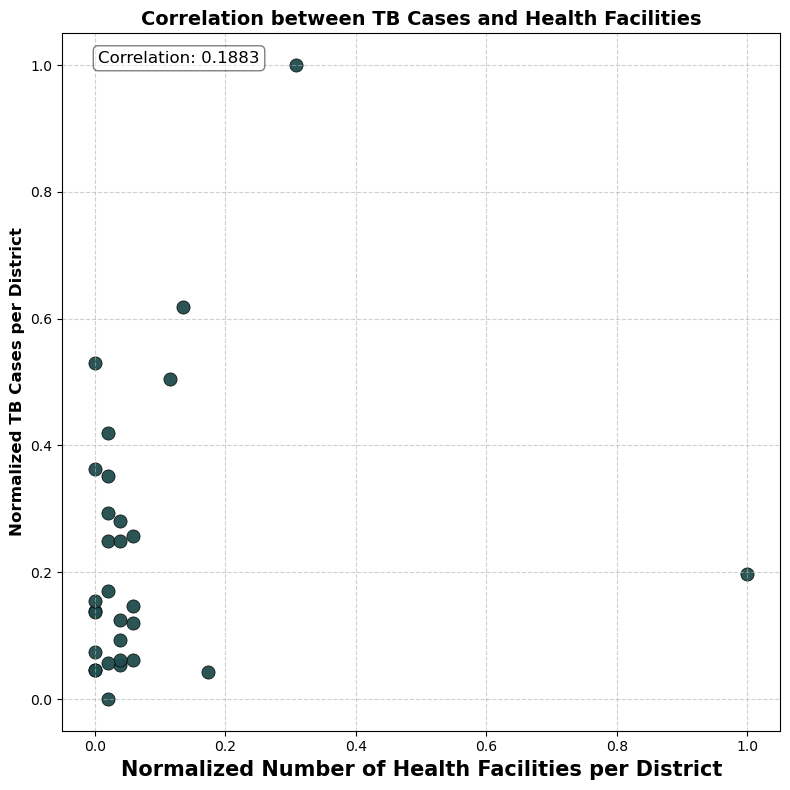

Correlation between normalized TB cases and normalized health facility count: 0.18827585809529795


In [14]:
# Calculate the number of health facilities per district
disease_gdf['facility_count'] = 0

for _, facility in main_facility_df.iterrows():
    for idx, district in disease_gdf.iterrows():
        if facility['geometry'].within(district['geometry']):
            disease_gdf.at[idx, 'facility_count'] += 1

disease_gdf['facility_density'] = disease_gdf['facility_count'] / disease_gdf['area']
correlation = disease_gdf[['tb_density', 'facility_density']].corr().iloc[0, 1]
print(f"Correlation between TB density and health facility density: {correlation}")

# Normalize data
disease_gdf['normalized_tb_cases'] = (disease_gdf['tb_dist_cases'] - disease_gdf['tb_dist_cases'].min()) / (disease_gdf['tb_dist_cases'].max() - disease_gdf['tb_dist_cases'].min())
disease_gdf['normalized_facility_count'] = (disease_gdf['facility_count'] - disease_gdf['facility_count'].min()) / (disease_gdf['facility_count'].max() - disease_gdf['facility_count'].min())

# Plot correlation
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(disease_gdf['normalized_facility_count'], disease_gdf['normalized_tb_cases'], 
           color= '#1F4C4C', alpha=0.95, s=90,edgecolor='black', linewidth=0.5)

# for idx, row in disease_gdf.iterrows():
#     ax.annotate(row['district'], (row['normalized_facility_count'], row['normalized_tb_cases']), 
#                 fontsize=8, alpha=0.7, fontweight='bold')

correlation = disease_gdf[['normalized_tb_cases', 'normalized_facility_count']].corr().iloc[0, 1]
normalized_correlation_text = (f"Correlation: {correlation:.4f}")
ax.text(0.05, 0.975, normalized_correlation_text, transform=ax.transAxes, fontsize=12, 
    verticalalignment= 'top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

ax.set_xlabel('Normalized Number of Health Facilities per District', fontsize=15, fontweight='bold')
ax.set_ylabel('Normalized TB Cases per District', fontsize=12, fontweight='bold')
ax.set_title('Correlation between TB Cases and Health Facilities', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

correlation = disease_gdf[['normalized_tb_cases', 'normalized_facility_count']].corr().iloc[0, 1]
print(f"Correlation between normalized TB cases and normalized health facility count: {correlation}")

# Add normalized correlation value to the plot #FDB515

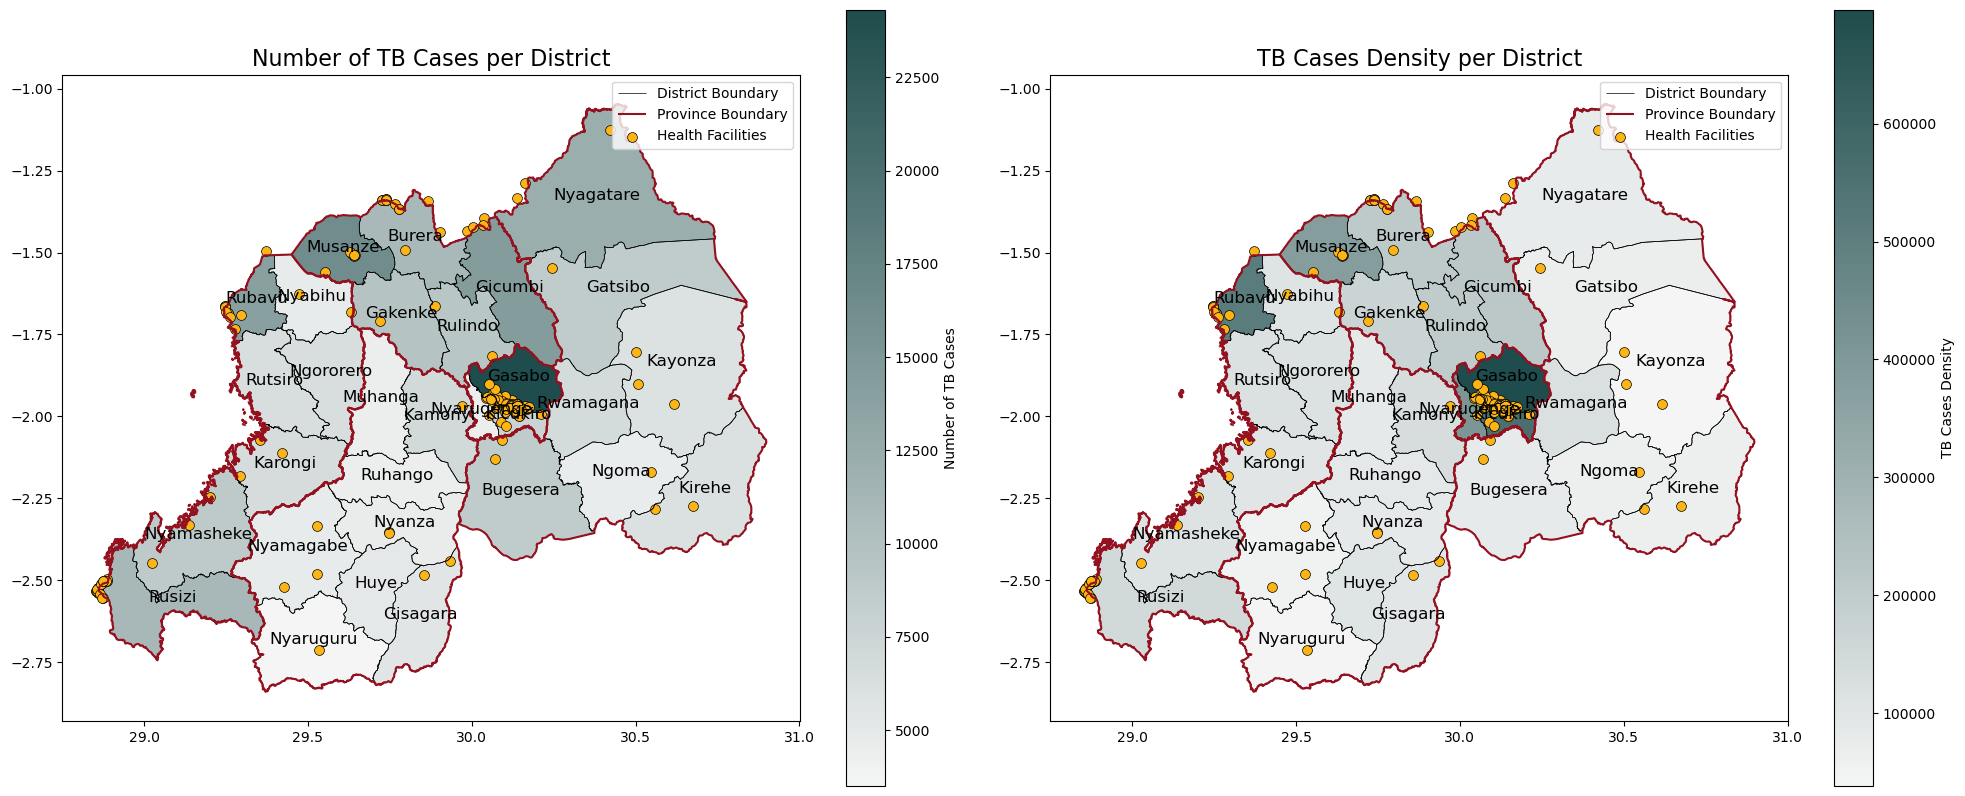

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#1F4C4C"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the TB cases heatmap
disease_gdf.plot(column="tb_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of TB Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
geo_points_df.plot(ax=axes[0], color='#FDB515', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of TB Cases per District", fontsize=16)
axes[0].legend()

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="tb_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "TB Cases Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
geo_points_df.plot(ax=axes[1], color='#FDB515', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

axes[1].set_title("TB Cases Density per District", fontsize=16)
axes[1].legend()

# Adjusting plot layout
plt.tight_layout()
plt.show()

Interpretation: 

- The heatmap compared density-wise distribution of Tuberculosis and, actual case toll per district.

### Malaria:
Just cases discovered via microscopy are considered. They are similar to number of cases discovered with rapid diagnostics test (RDT)

In [16]:
with open("rw_malaria.json", "r") as file:
    ml_data = json.load(file) 

# Convert the JSON data to a DataFrame
ml_df = pd.DataFrame(ml_data)
ml_df = ml_df.T

ml_df['total_ml_cases'] = (0.01*ml_df['malaria_prevalence_rdt']*ml_df['number_women_rdt']) + (0.01*ml_df['malaria_prevalence_rdt_children']*ml_df['number_children_rdt']) 
ml_df['ml_case_ratio_dist'] = ml_df['total_ml_cases'] / (ml_df['number_women_rdt'] + ml_df['number_children_rdt'])
ml_df.head(5)

# reset index and rename column to province
ml_df.reset_index(inplace=True)
ml_df.rename(columns={'index': 'category'}, inplace=True)

# disease_gdf['ml_cases'] = total_ml_cases*dist_pop_ratio where province_eng == index of ml_df
disease_gdf['ml_dist_ratio'] = disease_gdf['province_eng'].map(ml_df.set_index('category')['ml_case_ratio_dist']) * disease_gdf['dist_pop_ratio']
disease_gdf['ml_dist_cases'] = disease_gdf['ml_dist_ratio'] * disease_gdf['population']
disease_gdf['ml_density'] = disease_gdf['ml_dist_cases'] / disease_gdf['area']

#disease_gdf.head(5)

# ml_df.head(5)
# disease_gdf.head(5)


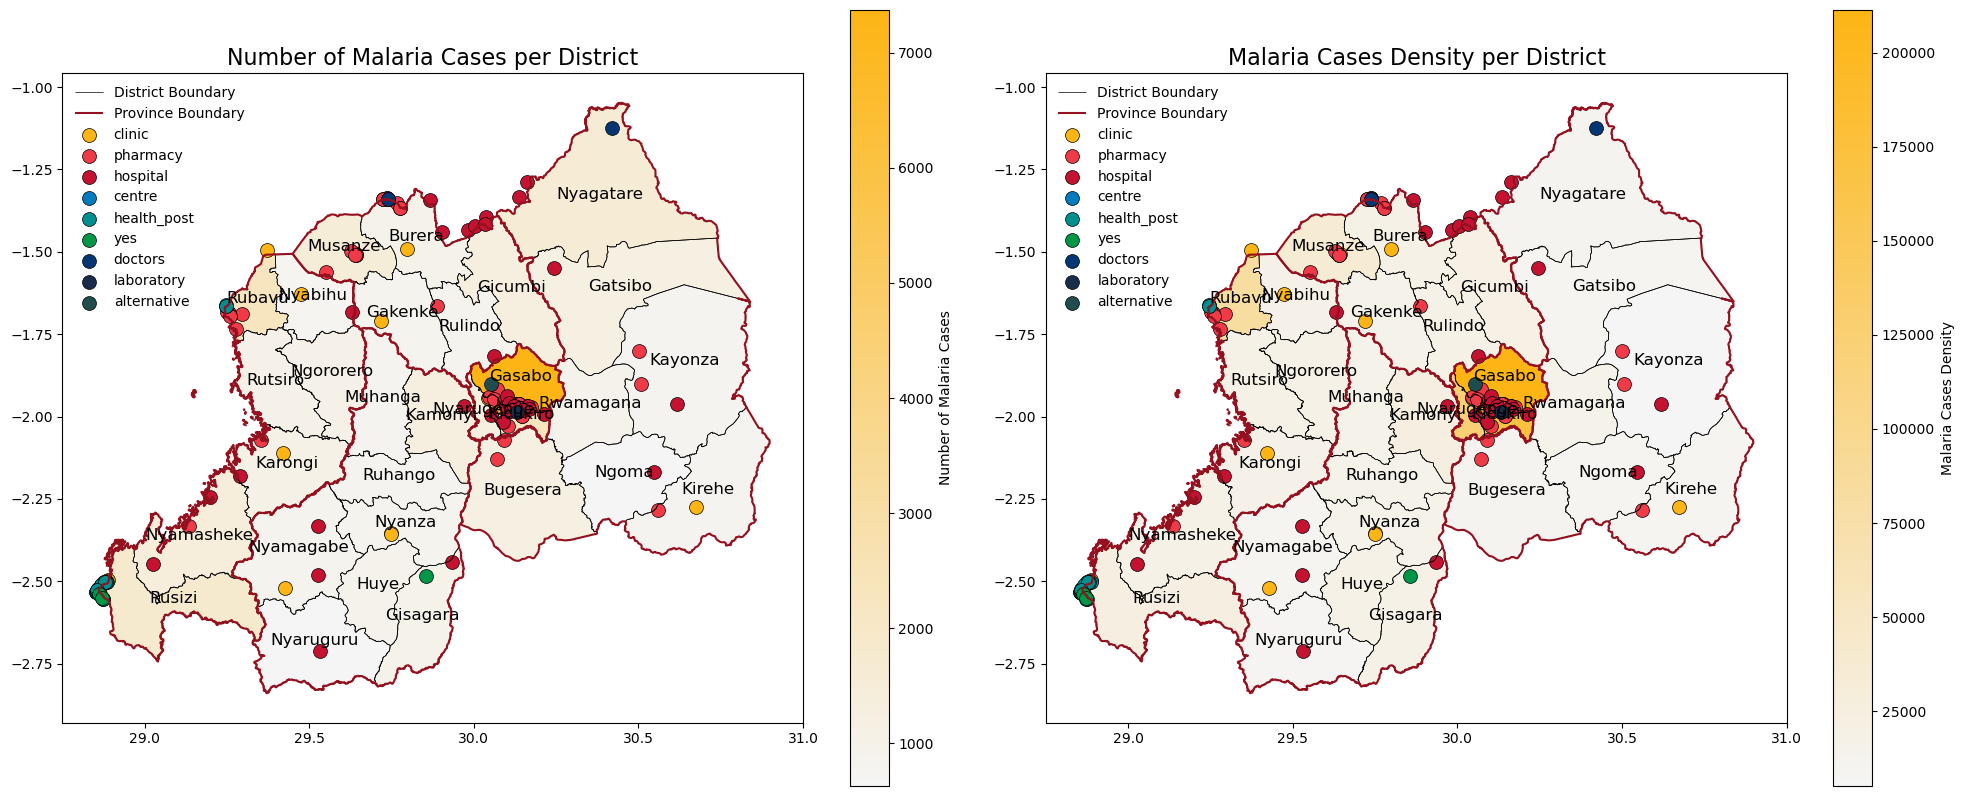

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#FDB515"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the TB cases heatmap
disease_gdf.plot(column="ml_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of Malaria Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=axes[0], color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of Malaria Cases per District", fontsize=16)
axes[0].legend(loc='upper left', frameon=False)

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="ml_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Malaria Cases Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=axes[1], color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

axes[1].set_title("Malaria Cases Density per District", fontsize=16)
axes[1].legend(loc='upper left', frameon=False)

# Adjusting plot layout
plt.tight_layout()
plt.show()

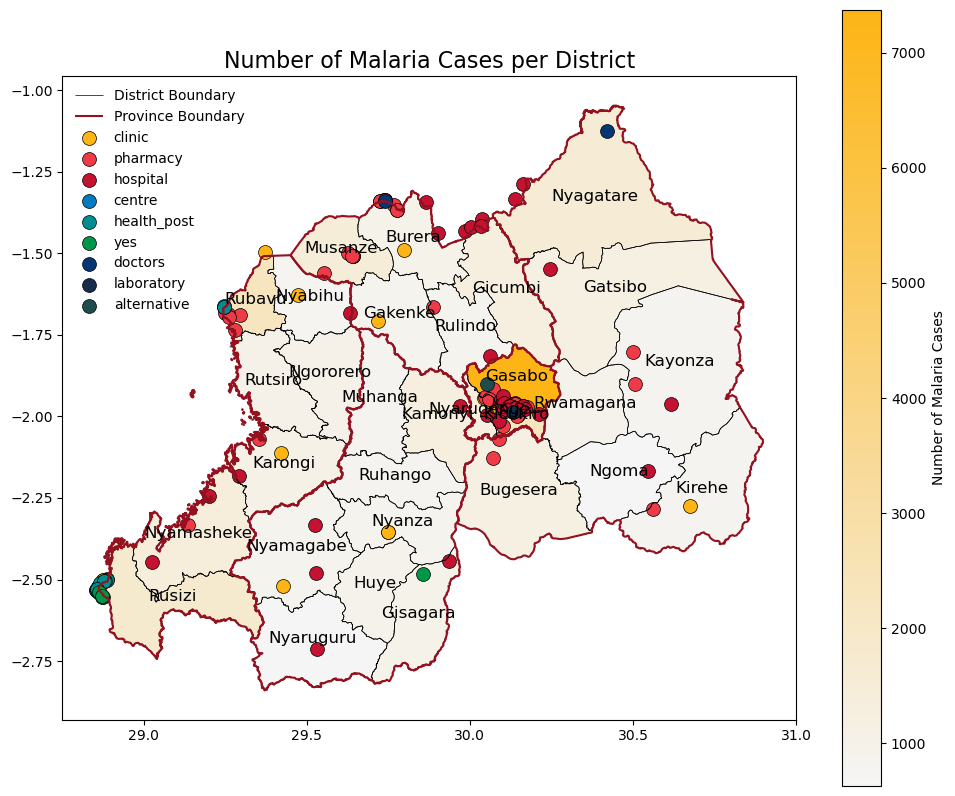

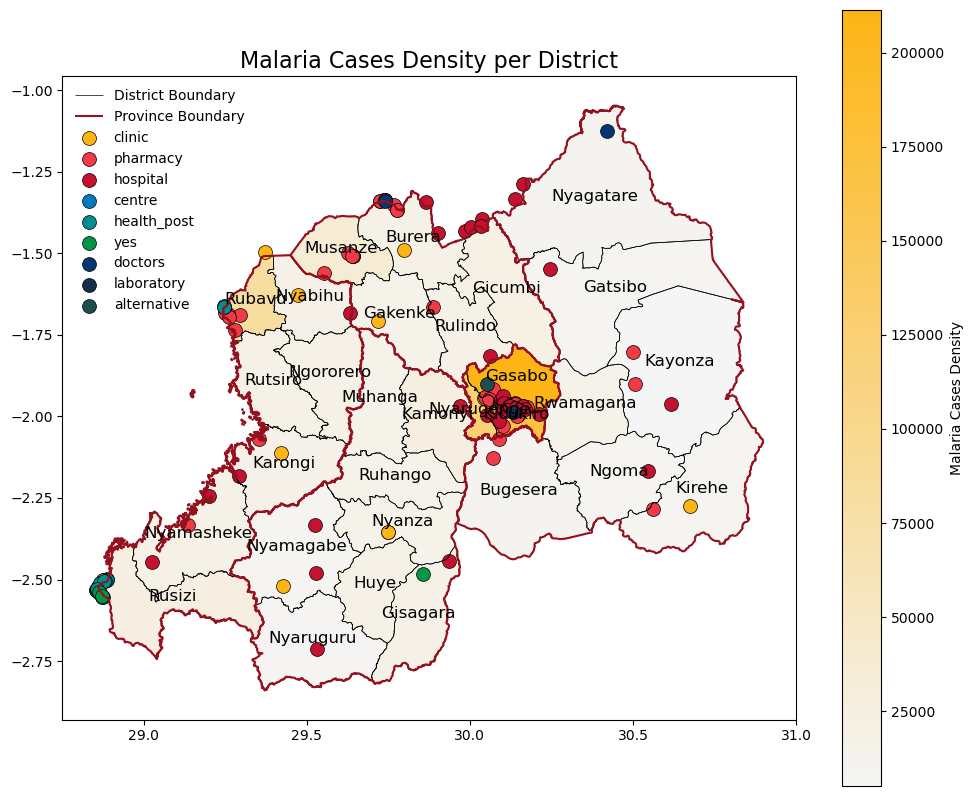

In [18]:
# --- First Plot: Number of Malaria Cases per District ---
fig, ax = plt.subplots(figsize=(10, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#FDB515"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the Malaria cases heatmap
disease_gdf.plot(column="ml_dist_cases", ax=ax, cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of Malaria Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title and legend
ax.set_title("Number of Malaria Cases per District", fontsize=16)
ax.legend(loc='upper left', frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# --- Second Plot: Malaria Cases Density per District ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# Plot the Malaria density heatmap
disease_gdf.plot(column="ml_density", ax=ax, cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Malaria Cases Density", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=ax, color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=12, color='black')

# Plot health facilities
for i, facility in enumerate(main_facility):
    facility_gdf = geo_points_df[geo_points_df['amenity'] == facility]
    facility_gdf.plot(ax=ax, color=colors[i % len(colors)], markersize=100, label=facility, edgecolor='black', linewidth=0.5)

# Add title and legend
ax.set_title("Malaria Cases Density per District", fontsize=16)
ax.legend(loc='upper left', frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Correlation between TB density and health facility density: 0.5828921976347301


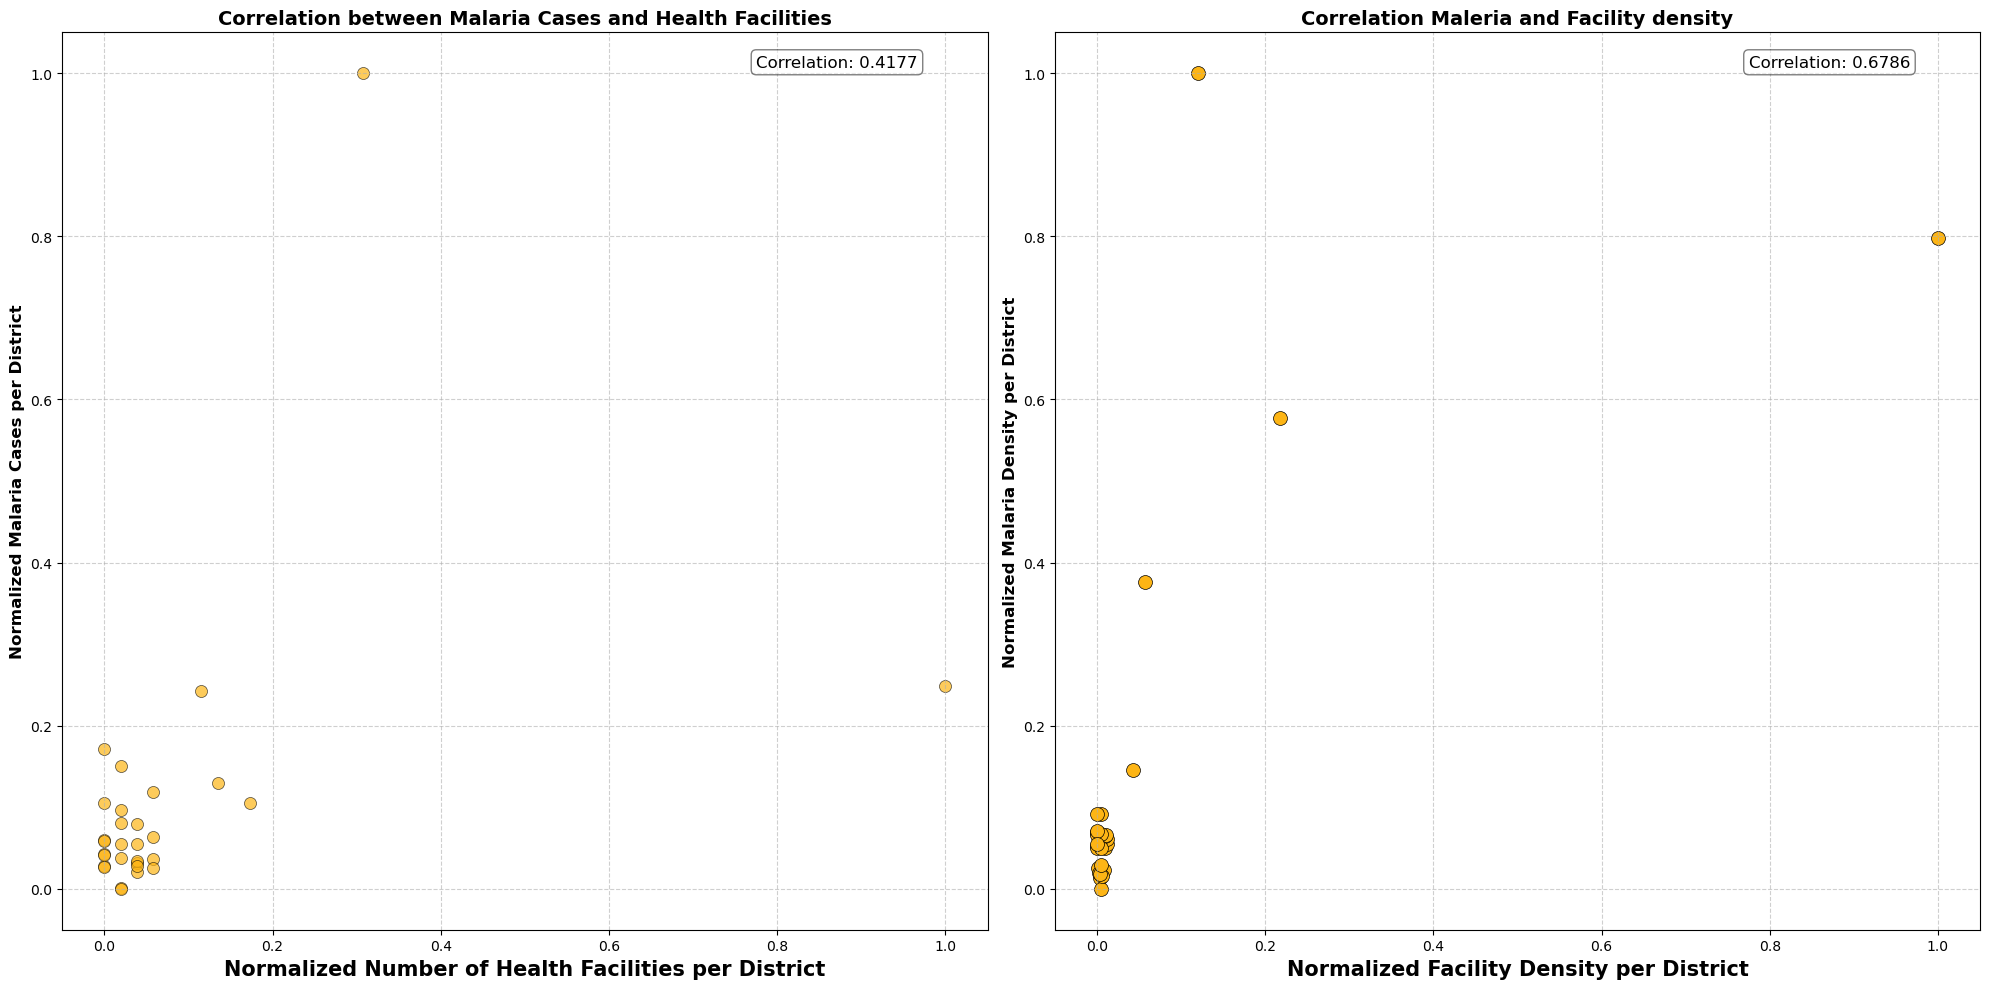

In [19]:
# Calculate the number of health facilities per district
disease_gdf['facility_count'] = 0

for _, facility in main_facility_df.iterrows():
    for idx, district in disease_gdf.iterrows():
        if facility['geometry'].within(district['geometry']):
            disease_gdf.at[idx, 'facility_count'] += 1

disease_gdf['facility_density'] = disease_gdf['facility_count'] / disease_gdf['area']
correlation = disease_gdf[['tb_density', 'facility_density']].corr().iloc[0, 1]
print(f"Correlation between TB density and health facility density: {correlation}")

# Normalize data
disease_gdf['normalized_ml_cases'] = (disease_gdf['ml_dist_cases'] - disease_gdf['ml_dist_cases'].min()) / (disease_gdf['ml_dist_cases'].max() - disease_gdf['ml_dist_cases'].min())
disease_gdf['normalized_facility_count'] = (disease_gdf['facility_count'] - disease_gdf['facility_count'].min()) / (disease_gdf['facility_count'].max() - disease_gdf['facility_count'].min())

disease_gdf['normalized_facility_density'] = (disease_gdf['facility_density'] - disease_gdf['facility_density'].min()) / (disease_gdf['facility_density'].max() - disease_gdf['facility_density'].min())
disease_gdf['normalized_ml_density'] = (disease_gdf['ml_density'] - disease_gdf['ml_density'].min()) / (disease_gdf['ml_density'].max() - disease_gdf['ml_density'].min())

# Plot correlation
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(disease_gdf['normalized_facility_count'], disease_gdf['normalized_ml_cases'], 
           color= '#FDB515', alpha=0.7, s=75, edgecolor='black', linewidth=0.5)

# for idx, row in disease_gdf.iterrows():
#     ax[0].annotate(row['district'], (row['normalized_facility_count'], row['normalized_ml_cases']), 
#                 fontsize=8, alpha=0.7, fontweight='bold')

correlation = disease_gdf[['normalized_ml_cases', 'normalized_facility_count']].corr().iloc[0, 1]
normalized_correlation_text = (f"Correlation: {correlation:.4f}")
ax[0].text(0.75, 0.975, normalized_correlation_text, transform=ax[0].transAxes, fontsize=12, 
    verticalalignment= 'top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

ax[0].set_xlabel('Normalized Number of Health Facilities per District', fontsize=15, fontweight='bold')
ax[0].set_ylabel('Normalized Malaria Cases per District', fontsize=12, fontweight='bold')
ax[0].set_title('Correlation between Malaria Cases and Health Facilities', fontsize=14, fontweight='bold')
ax[0].grid(True, linestyle='--', alpha=0.6)


ax[1].scatter(disease_gdf['normalized_facility_density'], disease_gdf['normalized_ml_density'], 
           color= '#FDB515', alpha=1.0, s=100,edgecolor='black', linewidth=0.5)

# for idx, row in disease_gdf.iterrows():
#     ax[1].annotate(row['district'], (row['normalized_facility_density'], row['normalized_ml_density']), 
#                 fontsize=8, alpha=0.7, fontweight='bold')

correlation = disease_gdf[['normalized_ml_density', 'normalized_facility_density']].corr().iloc[0, 1]
normalized_correlation_text = (f"Correlation: {correlation:.4f}")
ax[1].text(0.75, 0.975, normalized_correlation_text, transform=ax[1].transAxes, fontsize=12, 
    verticalalignment= 'top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

ax[1].set_xlabel('Normalized Facility Density per District', fontsize=15, fontweight='bold')
ax[1].set_ylabel('Normalized Malaria Density per District', fontsize=12, fontweight='bold')
ax[1].set_title('Correlation Maleria and Facility density', fontsize=14, fontweight='bold')
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Add normalized correlation value to the plot #FDB515

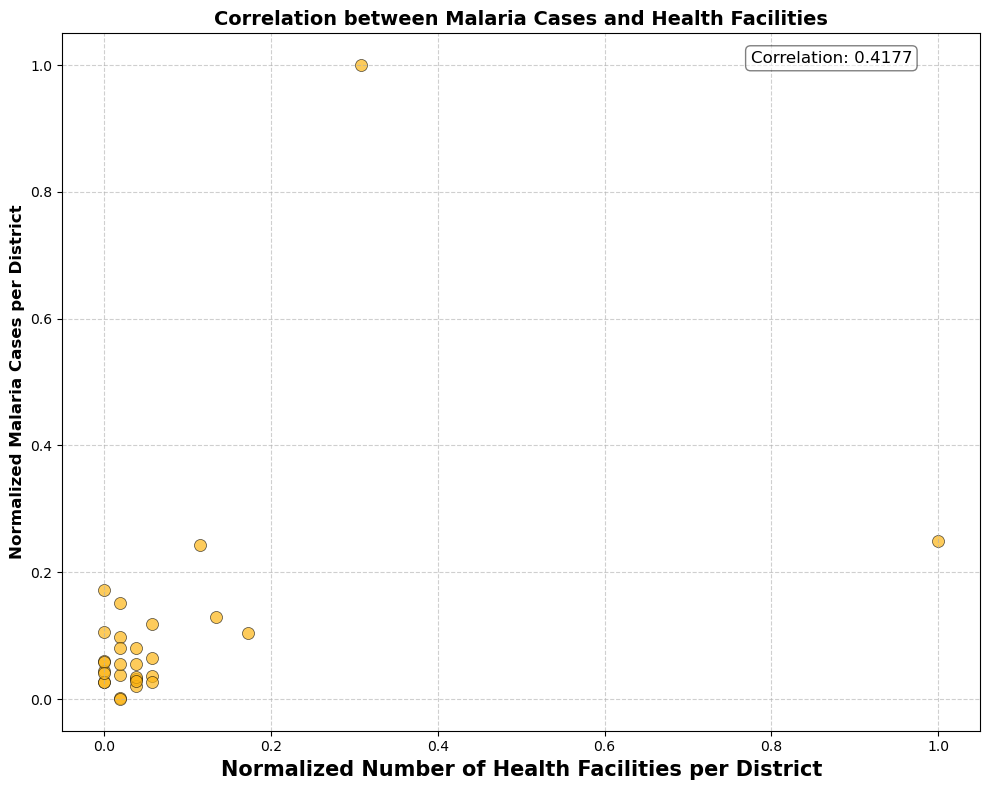

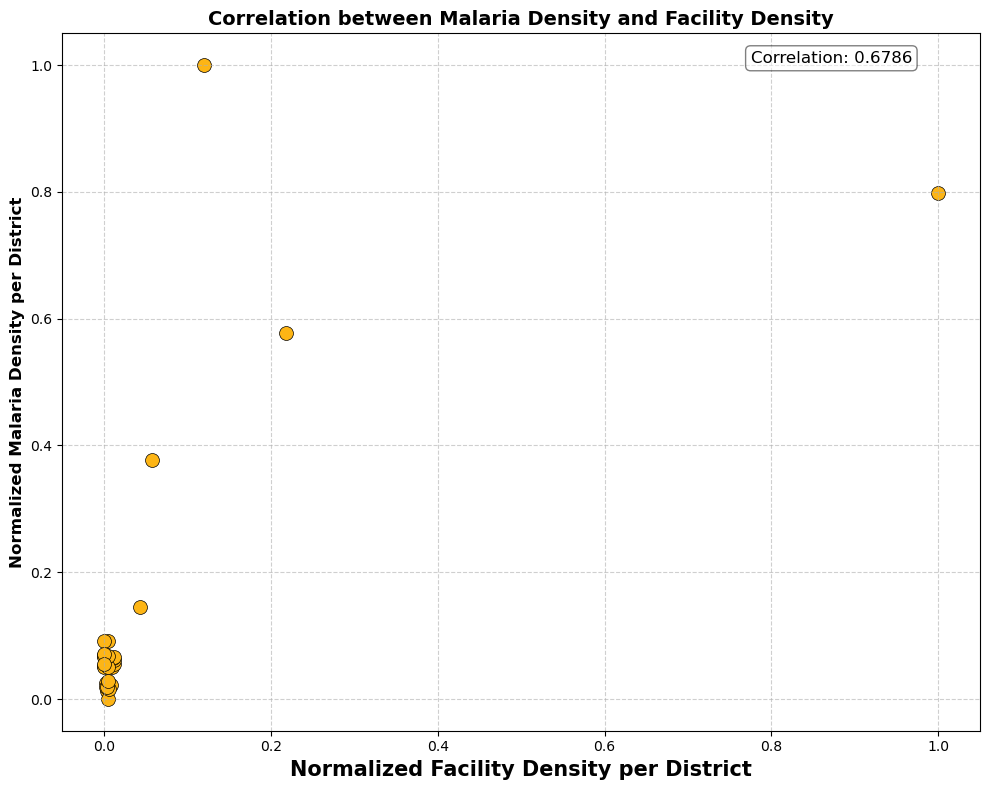

In [27]:
# --- First Plot: Correlation between Malaria Cases and Health Facilities ---
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for normalized facility count vs. normalized malaria cases
ax.scatter(disease_gdf['normalized_facility_count'], disease_gdf['normalized_ml_cases'], 
           color='#FDB515', alpha=0.7, s=75, edgecolor='black', linewidth=0.5)

# Add correlation text
correlation = disease_gdf[['normalized_ml_cases', 'normalized_facility_count']].corr().iloc[0, 1]
normalized_correlation_text = f"Correlation: {correlation:.4f}"
ax.text(0.75, 0.975, normalized_correlation_text, transform=ax.transAxes, fontsize=12, 
        verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

# Set labels and title
ax.set_xlabel('Normalized Number of Health Facilities per District', fontsize=15, fontweight='bold')
ax.set_ylabel('Normalized Malaria Cases per District', fontsize=12, fontweight='bold')
ax.set_title('Correlation between Malaria Cases and Health Facilities', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# --- Second Plot: Correlation between Malaria Density and Facility Density ---
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for normalized facility density vs. normalized malaria density
ax.scatter(disease_gdf['normalized_facility_density'], disease_gdf['normalized_ml_density'], 
           color='#FDB515', alpha=1.0, s=100, edgecolor='black', linewidth=0.5)

# Add correlation text
correlation = disease_gdf[['normalized_ml_density', 'normalized_facility_density']].corr().iloc[0, 1]
normalized_correlation_text = f"Correlation: {correlation:.4f}"
ax.text(0.75, 0.975, normalized_correlation_text, transform=ax.transAxes, fontsize=12, 
        verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

# Set labels and title
ax.set_xlabel('Normalized Facility Density per District', fontsize=15, fontweight='bold')
ax.set_ylabel('Normalized Malaria Density per District', fontsize=12, fontweight='bold')
ax.set_title('Correlation between Malaria Density and Facility Density', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


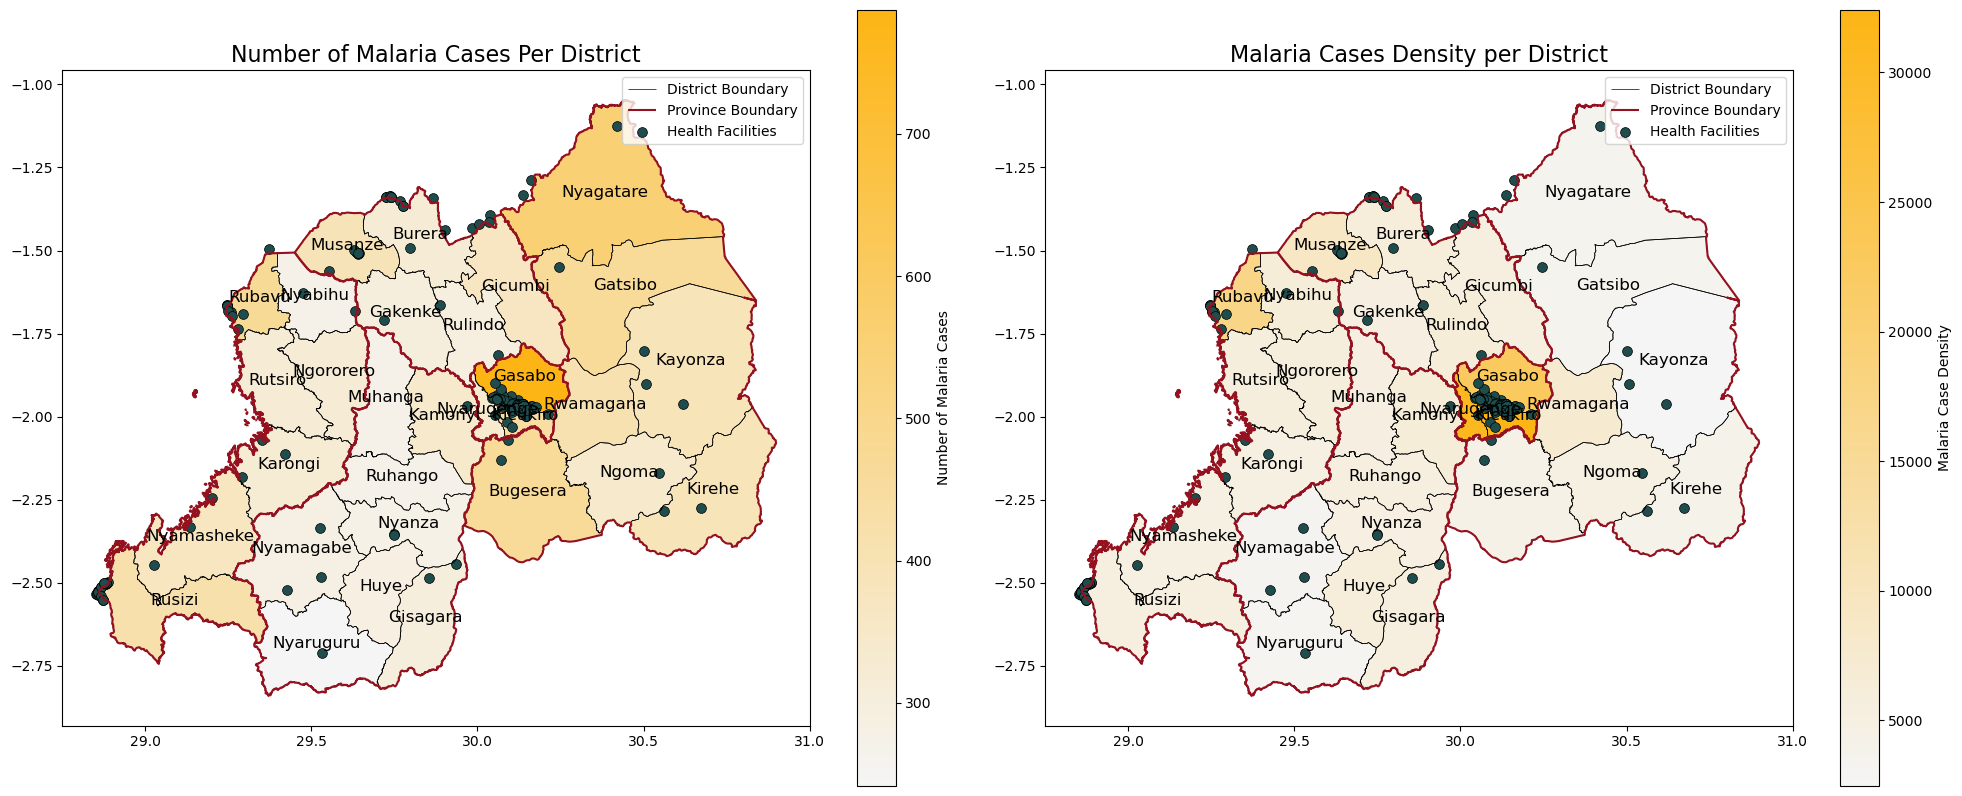

1        Gasabo
23    Nyagatare
13       Rubavu
24      Gatsibo
28     Bugesera
2      Kicukiro
16       Rusizi
29    Rwamagana
20      Musanze
26       Kirehe
Name: district, dtype: object
1         Gasabo
20       Musanze
22       Gicumbi
13        Rubavu
23     Nyagatare
16        Rusizi
21        Burera
19       Gakenke
18       Rulindo
17    Nyamasheke
Name: district, dtype: object


In [20]:
malaria_df = pd.read_csv('../data/rw_malaria.csv')

malaria_df['total_malaria_cases'] = malaria_df['num_of_women'] + malaria_df['num_of_children']

disease_gdf['malaria_dist_cases'] = disease_gdf['province_eng'].map(malaria_df.set_index('province')['total_malaria_cases']) * disease_gdf['dist_pop_ratio']
disease_gdf['malaria_density'] = disease_gdf['malaria_dist_cases'] / disease_gdf['area']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Define the gradient for the colormap
gradient = ["#F5F5F5", "#FDB515"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)

# --- First Plot: TB Cases per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[0], color="black", linewidth=0.5, label='District Boundary')

# Plot the Malaria cases heatmap
disease_gdf.plot(column="malaria_dist_cases", ax=axes[0], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Number of Malaria Cases", "shrink": 0.8})

# Plot province boundaries
province_gdf.boundary.plot(ax=axes[0], color='#941120', linewidth=1.5, label='Province Boundary')

# Add district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[0].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot health facilities
geo_points_df.plot(ax=axes[0], color='#1F4C4C', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

# Add title for the first plot
axes[0].set_title("Number of Malaria Cases Per District", fontsize=16)
axes[0].legend()

# --- Second Plot: TB Density per District ---
# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=axes[1], color="black", linewidth=0.5, label='District Boundary')

# Ploting the TB density heatmap
disease_gdf.plot(column="malaria_density", ax=axes[1], cmap=custom_cmap, legend=True, 
                 legend_kwds={"label": "Malaria Case Density", "shrink": 0.8})

# Ploting province boundaries
province_gdf.boundary.plot(ax=axes[1], color='#941120', linewidth=1.5, label='Province Boundary')

# Adding district names as annotations
for idx, row in disease_gdf.iterrows():
    axes[1].annotate(text=row["district"], 
                     xy=[row["Centroid"].x, row["Centroid"].y], 
                     ha='center', fontsize=12, color='black')

# Plot of health facilities
geo_points_df.plot(ax=axes[1], color='#1F4C4C', markersize=50, label='Health Facilities', 
                   legend=True, edgecolor='black', linewidth=0.5)

axes[1].set_title("Malaria Cases Density per District", fontsize=16)
axes[1].legend()

# Adjusting plot layout
plt.tight_layout()
plt.show()

# Districts with the highest number of Malaria cases
malaria_top_districts = disease_gdf.sort_values(by='malaria_dist_cases', ascending=False).head(10)
tb_top_districts = disease_gdf.sort_values(by='tb_dist_cases', ascending=False).head(10)

print(malaria_top_districts['district'])
print(tb_top_districts['district'])

### HIV/AIDS 

In [21]:
# 

### Correlation Annalysis

In [22]:
corr_df = disease_gdf[['province_eng','dist_code','district	','pop_density', 'tb_density', 'malaria_density']].copy()

KeyError: "['district\\t'] not in index"

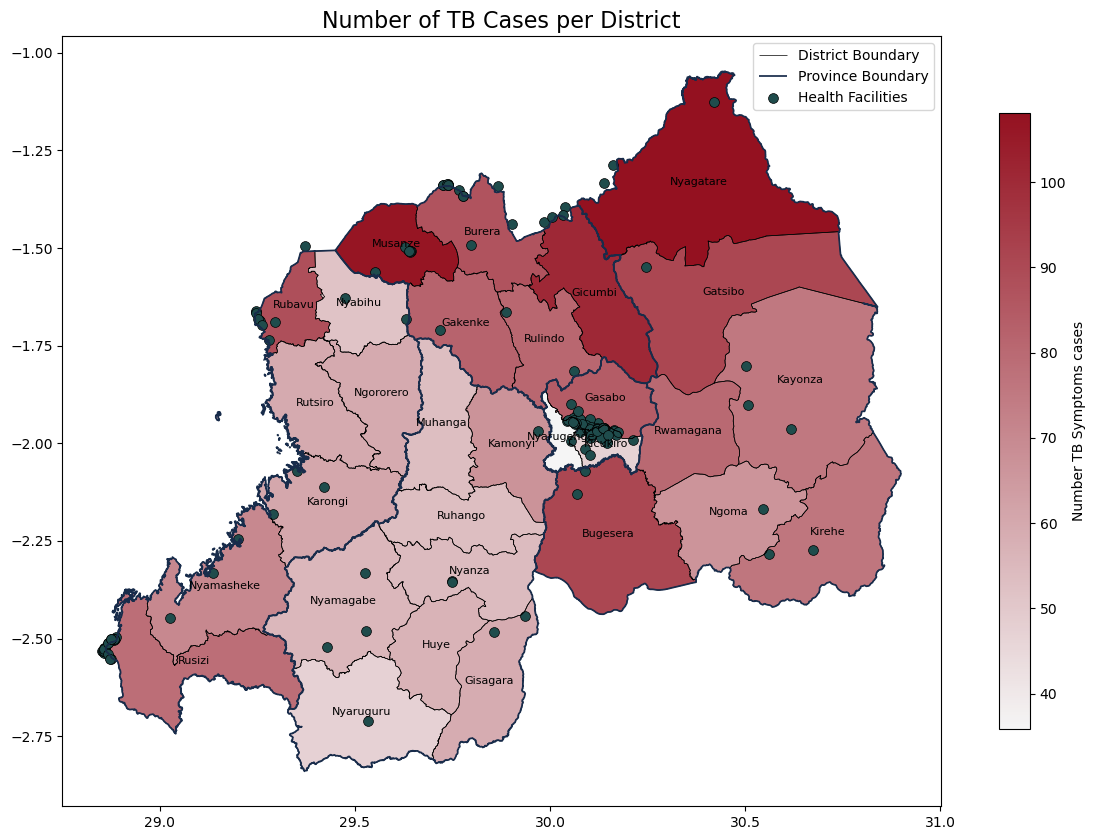

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the tb population heatmap
disease_gdf.plot(column="tb_dist_cases", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "Number TB Symptoms cases", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Number of TB Cases per District", fontsize=16)
plt.legend()
# Show plot
plt.show()

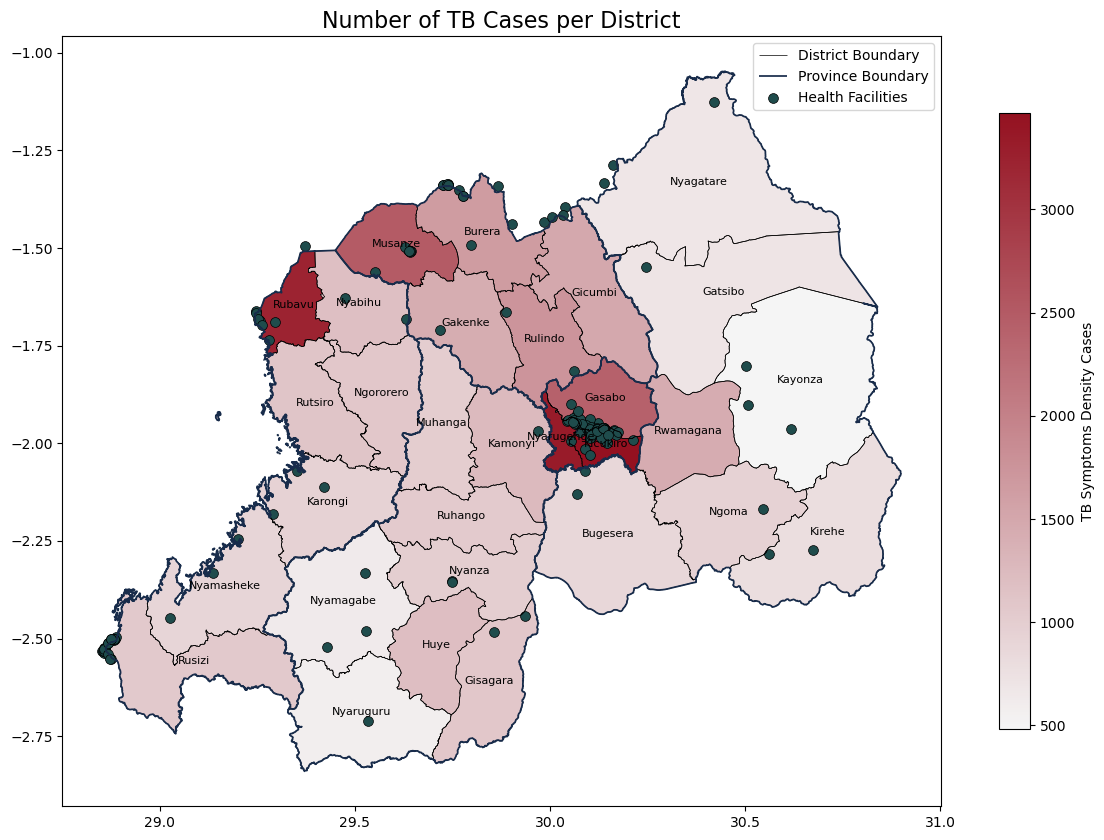

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the base map (district boundaries)
disease_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, label='District Boundary')

# #F5F5F5 #BCB49E
gradient = ["#F5F5F5", "#941120"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient)


# Plot the tb population heatmap
disease_gdf.plot(column="tb_density", ax=ax, cmap=custom_cmap, legend=True, 
         legend_kwds={"label": "TB Symptoms Density Cases", "shrink": 0.8})
province_gdf.boundary.plot(ax=ax, color='#182C4B', linewidth=1.25, label='Province Boundary')

# Add district names as annotations (optional)
for idx, row in disease_gdf.iterrows():
    ax.annotate(text=row["district"], 
                xy=[row["Centroid"].x, row["Centroid"].y], 
                ha='center', fontsize=8, color='black')

geo_points_df.plot(ax=ax, color='#1F4C4C', markersize=50, label='Health Facilities', legend=True, edgecolor='black', linewidth=0.5)

# Add title
plt.title("Number of TB Cases per District", fontsize=16)
plt.legend()
# Show plot
plt.show()

### Focus on the health centers that are capable of handling tubaculosis